### **Proyecto**

**Conectar Drive para obtener Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Aumentar RAM de Google Colab**

In [ ]:
a = []
while(1):
    a.append('1')

#YA NO SIRVE :(

**Código para evitar que se cierre colab**

function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

**Carga de Librerías**

In [ ]:
import numpy as np
import keras
import tensorflow
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import np_utils
import cv2
import os
import random
from google.colab.patches import cv2_imshow
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Categorias de las fotos
CATEGORIES=[ "01_palm","02_l","03_fist","04_fist_moved","05_thumb","06_palm_moved"]

In [ ]:
#Establecemos ruta del dataset
ruta_data="/content/drive/My Drive/leapGestRecog"

**Imágen de prueba para definir size adecuado**

(240, 640)


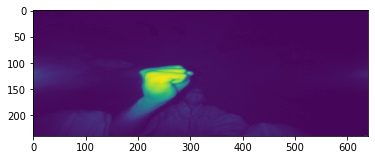

[[ 4  3  3 ...  4  3  3]
 [ 5  5  6 ...  4  4  3]
 [ 4  6  4 ...  4  4  3]
 ...
 [ 6  6  6 ...  5  3  4]
 [ 5  6  8 ...  3  3  5]
 [ 6  7  6 ... 25 12 16]]


In [ ]:
#img_test= cv2.imread('/content/drive/My Drive/leapGestRecog/04_fist_moved/frame_01_04_0191.png') #Foto original
img_test= cv2.imread('/content/drive/My Drive/leapGestRecog/04_fist_moved/frame_01_04_0191.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_test)
print(img_test.shape)
plt.show()
print(img_test)

(100, 100)


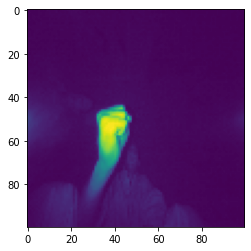

[[4 4 4 ... 3 4 4]
 [4 5 4 ... 4 3 4]
 [5 4 5 ... 4 4 3]
 ...
 [7 8 7 ... 3 5 3]
 [6 8 7 ... 2 5 4]
 [7 7 8 ... 4 4 6]]


In [ ]:
#Establecemos el size de imagen con el que trabajaremos
IMG_SIZE=100
new_array= cv2.resize(img_test,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
print(new_array.shape)
plt.show()
print(new_array)

(100, 100)


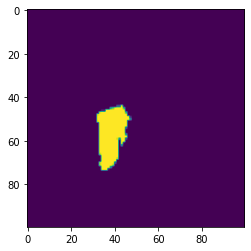

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#img = cv2.erode(img,kernel,iterations = 1)
img_test = cv2.morphologyEx(img_test, cv2.MORPH_OPEN, kernel)
img_test = cv2.morphologyEx(img_test, cv2.MORPH_CLOSE, kernel)
#imgray = cv2.cvtColor(img_test,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(img_test,(5,5),0)
ret,thresh = cv2.threshold(imgray,110,255,0)
array_final=cv2.resize(thresh,(IMG_SIZE,IMG_SIZE))
plt.imshow(array_final)
print(array_final.shape)
plt.show()
print(array_final)
 

**Cargamos una imagen aleatoria de cada clase para realizar análisis**




/content/drive/My Drive/leapGestRecog/01_palm
frame_04_01_0068.png
Forma original de la imagen (240, 640)
Forma despues de resize (100, 100)


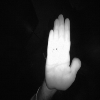

/content/drive/My Drive/leapGestRecog/02_l
frame_06_02_0042.png
Forma original de la imagen (240, 640)
Forma despues de resize (100, 100)


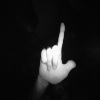

/content/drive/My Drive/leapGestRecog/03_fist
frame_07_03_0169.png
Forma original de la imagen (240, 640)
Forma despues de resize (100, 100)


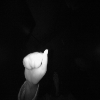

/content/drive/My Drive/leapGestRecog/04_fist_moved
frame_06_04_0145.png
Forma original de la imagen (240, 640)
Forma despues de resize (100, 100)


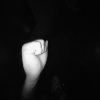

/content/drive/My Drive/leapGestRecog/05_thumb
frame_04_05_0102.png
Forma original de la imagen (240, 640)
Forma despues de resize (100, 100)


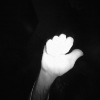

/content/drive/My Drive/leapGestRecog/06_palm_moved
frame_02_08_0009.png
Forma original de la imagen (240, 640)
Forma despues de resize (100, 100)


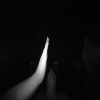

In [ ]:
imagenes=[]
for category in CATEGORIES:
  ruta=os.path.join(ruta_data,category)
  print(ruta)
  img_sel=random.choice(os.listdir(ruta))
  print(img_sel)
  img2=cv2.imread(ruta+'/'+img_sel, cv2.IMREAD_GRAYSCALE)
  print("Forma original de la imagen", img2.shape)
  img2=cv2.resize(img2,(IMG_SIZE,IMG_SIZE))
  print("Forma despues de resize", img2.shape)
  cv2_imshow(img2)
  imagenes.append(img2)

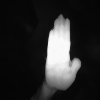

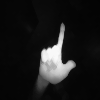

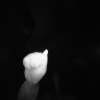

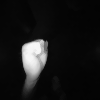

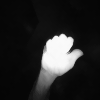

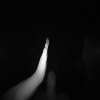

In [ ]:
#Reliazamos mejoras en la imagen
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
for img in imagenes:
  #img = cv2.erode(img,kernel,iterations = 1)
  img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  img=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
  cv2_imshow(img)

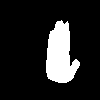

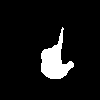

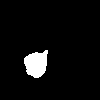

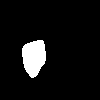

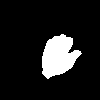

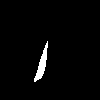

In [ ]:
#B/N Threshold
imggrays=[]
thres0=[]
for img in imagenes:
  #imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  imgray = cv2.GaussianBlur(img,(5,5),0)
  imggrays.append(imgray)
  ret,thresh = cv2.threshold(imgray,130,255,0)
  thres0.append(thresh)
  cv2_imshow(thresh)

In [ ]:
thres1=[]
thres2=[]
thres3=[]
blures=[]
for img in imggrays:
  # global thresholding
  ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  thres1.append(th1)
  # Otsu's thresholding
  ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  thres2.append(th2)
  # Otsu's thresholding after Gaussian filtering
  blur = cv2.GaussianBlur(img,(5,5),0)
  blures.append(blur)
  ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  thres3.append(th3)

*********************************************************************************************************************************
01_palm
*********************************************************************************************************************************
02_l
*********************************************************************************************************************************
03_fist
*********************************************************************************************************************************
04_fist_moved
*********************************************************************************************************************************
05_thumb
*********************************************************************************************************************************
06_palm_moved


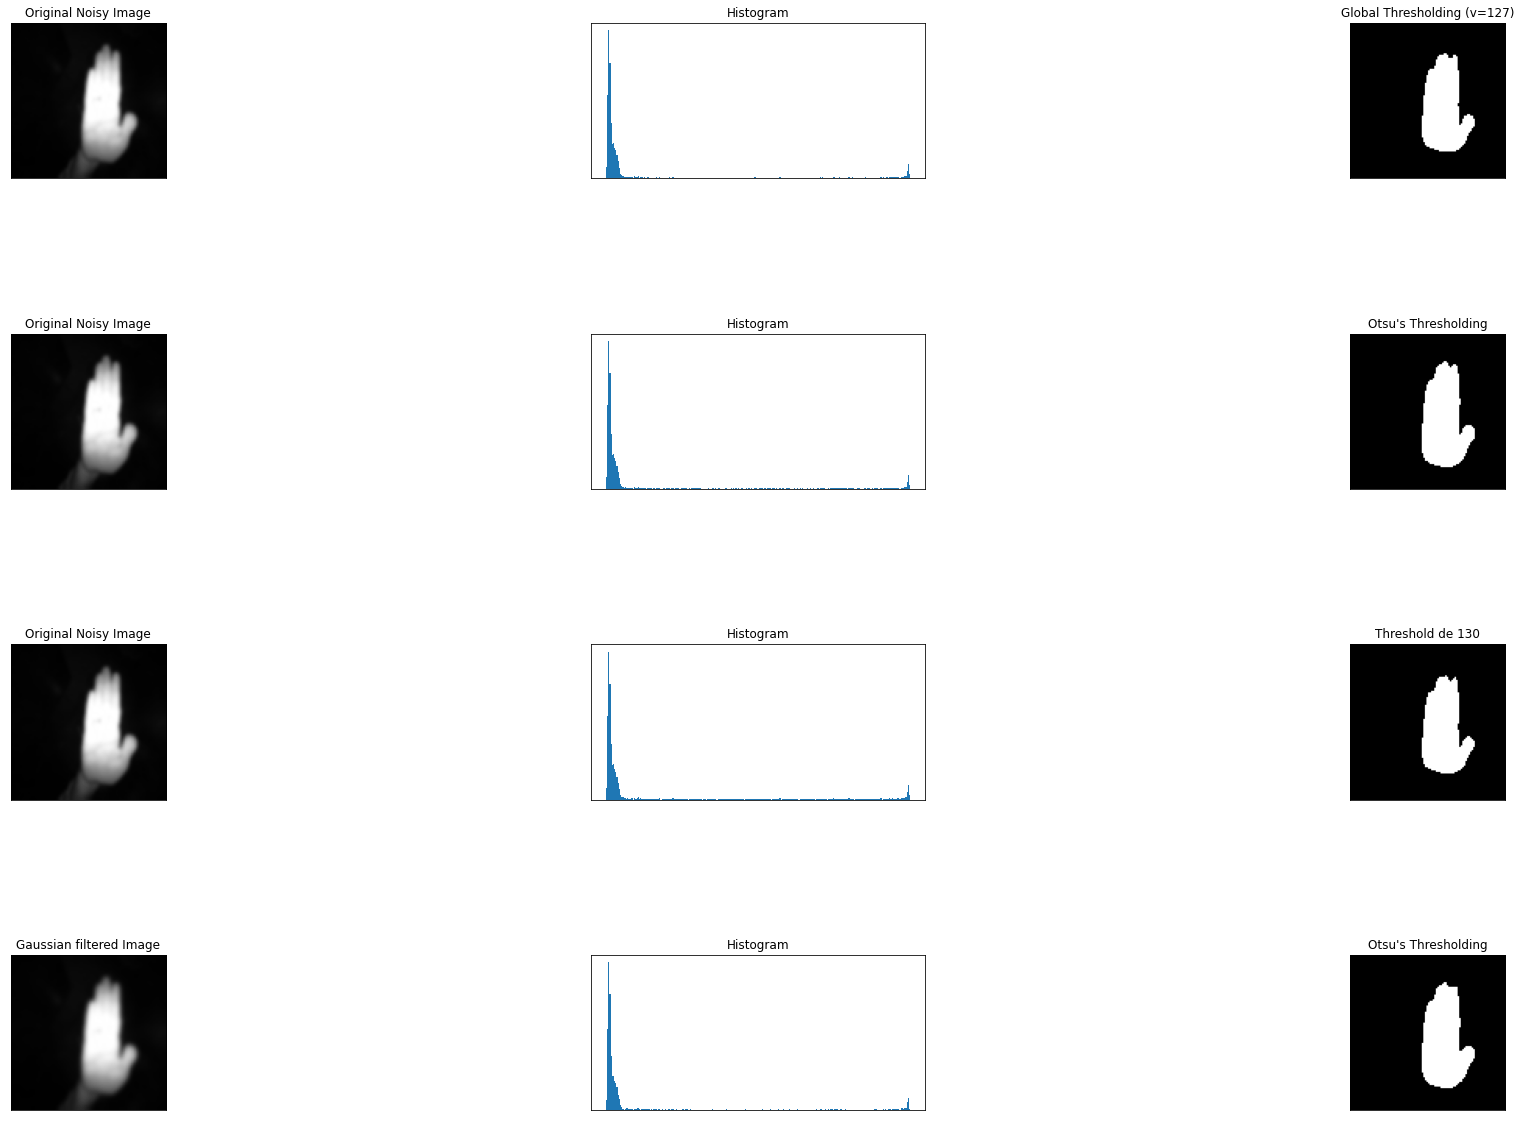

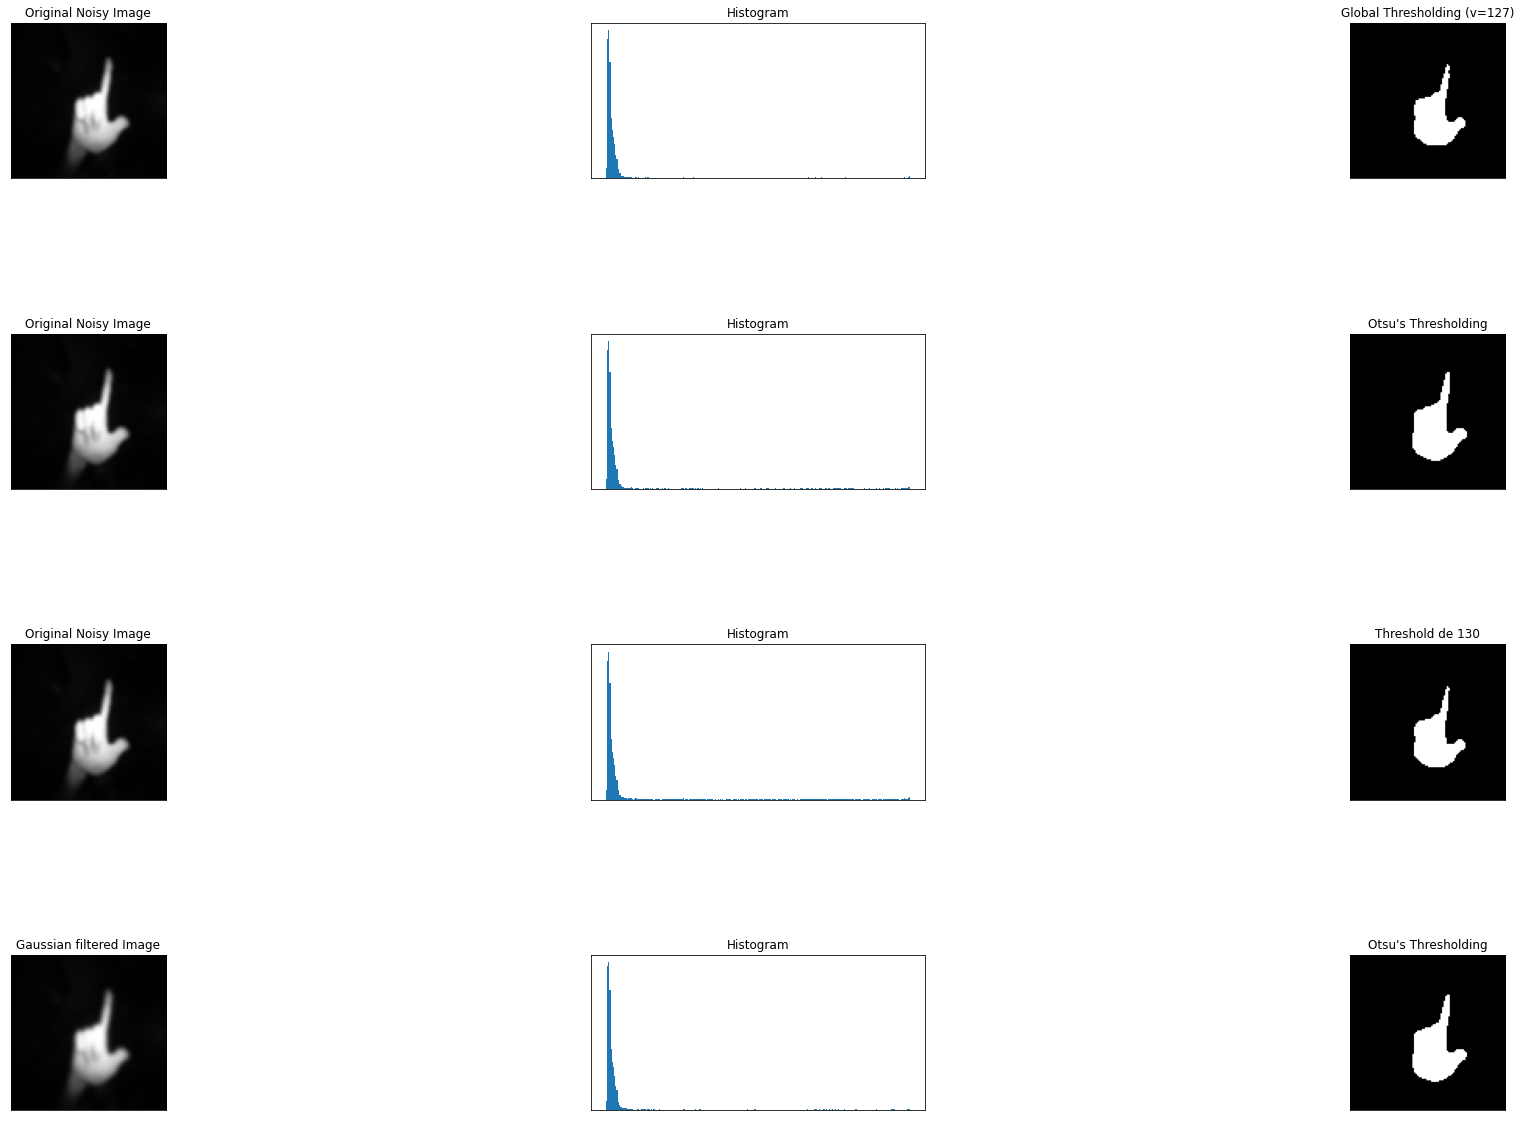

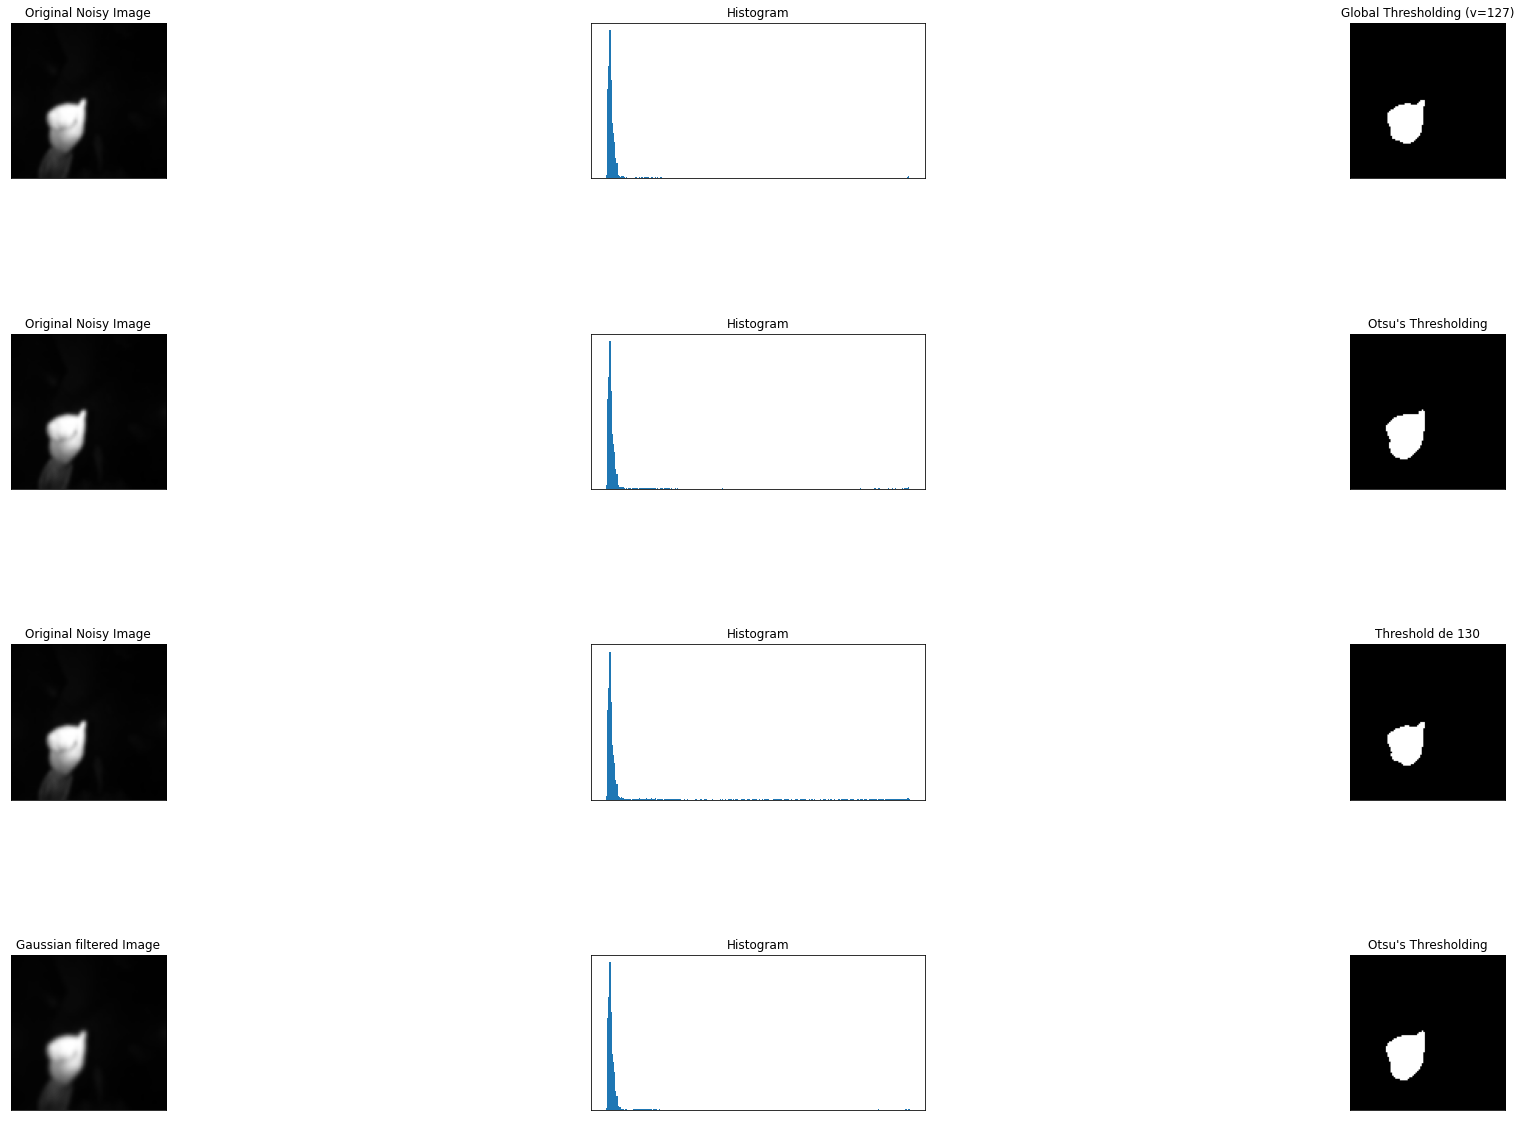

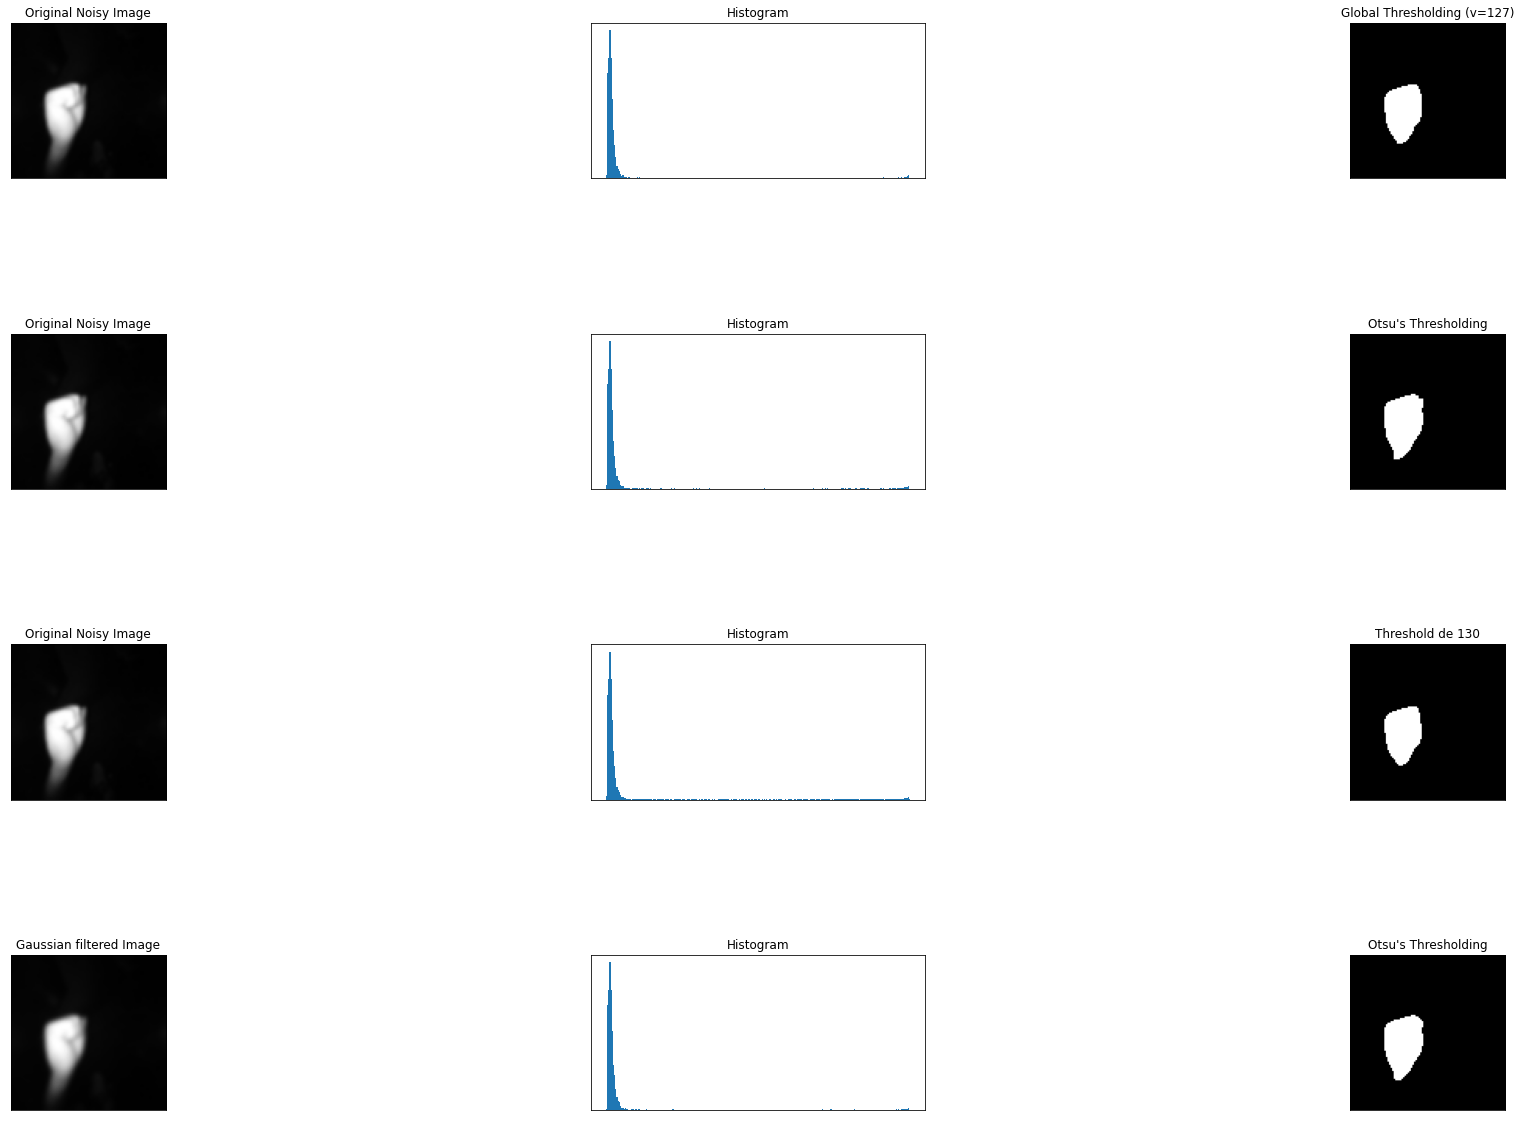

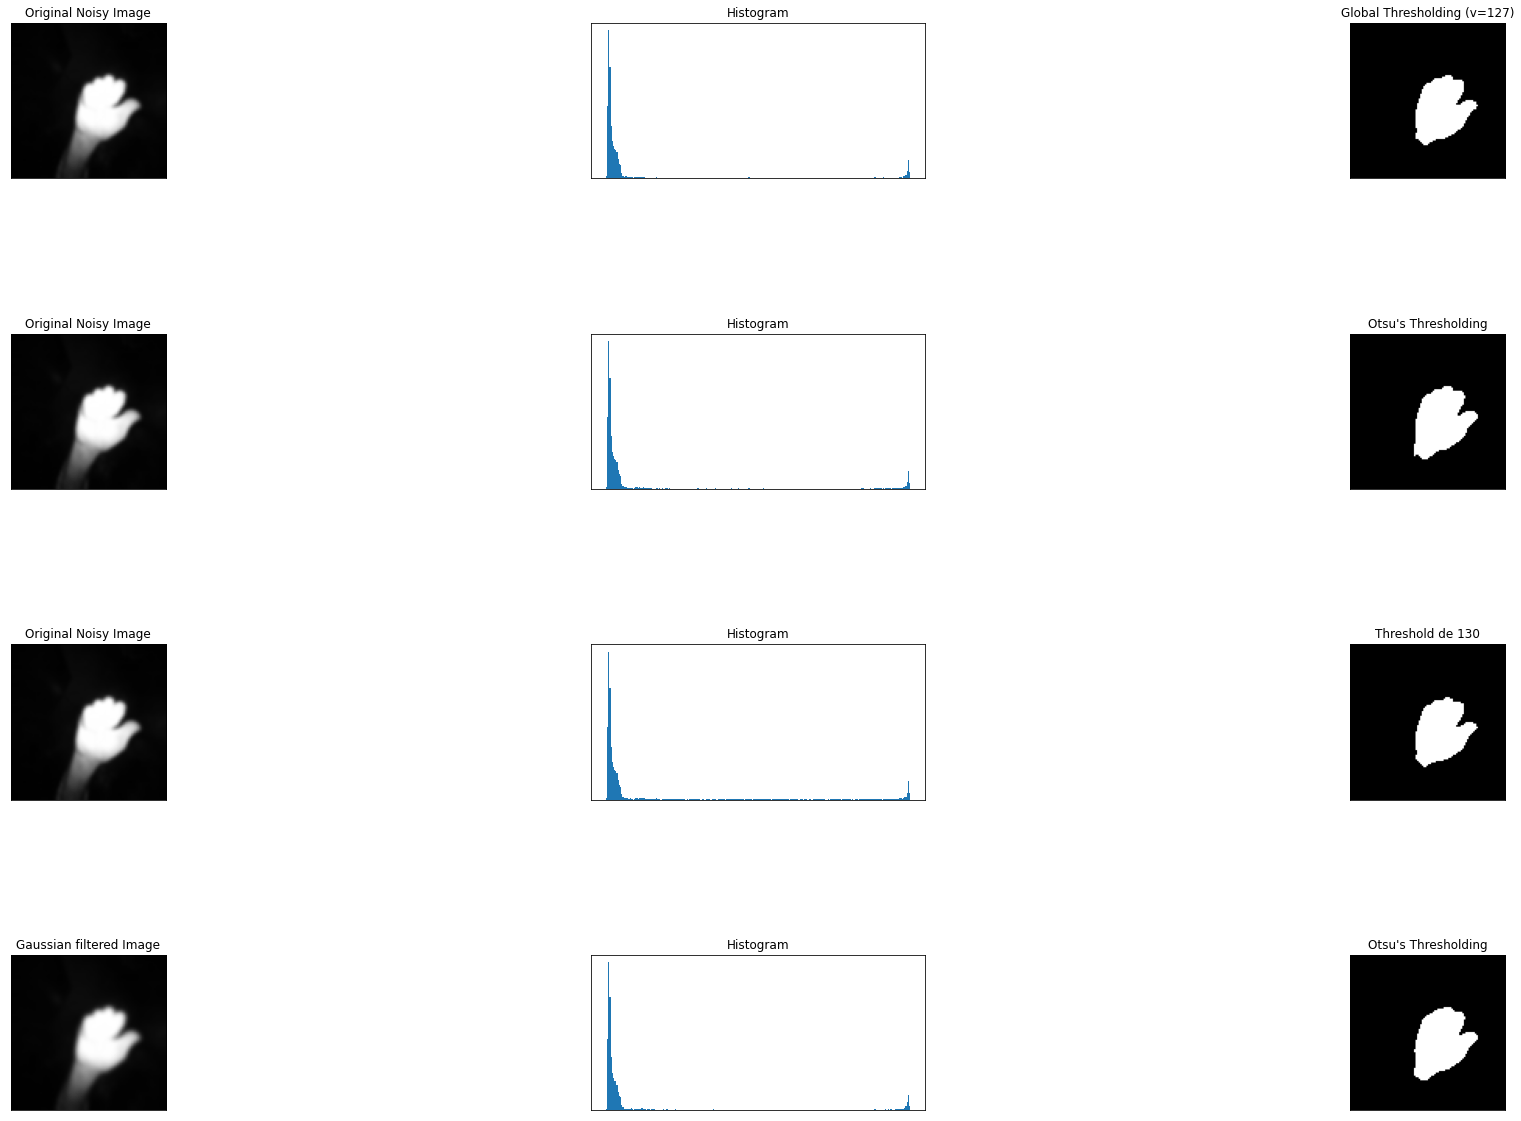

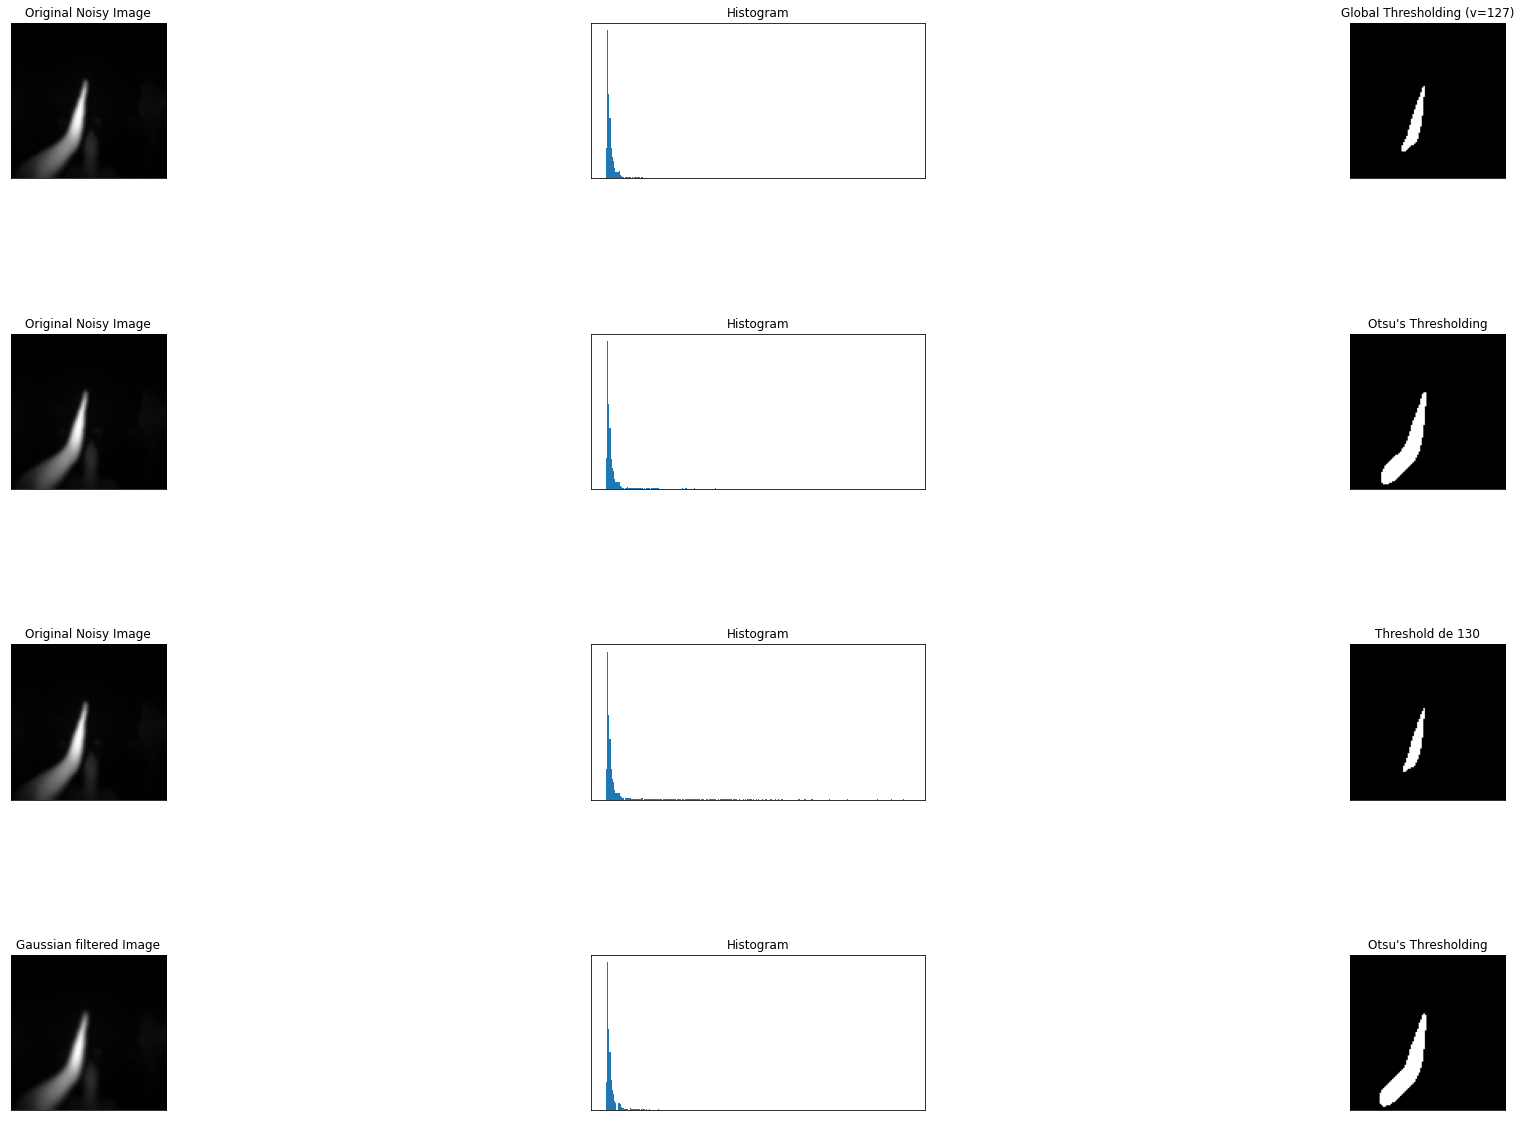

In [ ]:
for x in range(len(thres1)):
# plot all the images and their histograms
  print('*********************************************************************************************************************************')
  print(CATEGORIES[x]) 
  
  fig = plt.figure()
  fig.subplots_adjust(hspace=1, wspace=1)
  images = [imggrays[x], 0, thres1[x],
            imggrays[x], 0, thres2[x],
            imggrays[x], 0, thres0[x],
            blures[x], 0, thres3[x]]
  titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding",
            'Original Noisy Image','Histogram',"Threshold de 130",
            'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]   
  for i in range(0,4):
      plt.subplot(4,3,i*3+1),plt.imshow(images[i*3],'gray')
      plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
      plt.subplot(4,3,i*3+2),plt.hist(images[i*3].ravel(),256)
      plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
      plt.subplot(4,3,i*3+3),plt.imshow(images[i*3+2],'gray')
      plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
  plt.gcf().set_size_inches([30,20])

  

  

In [ ]:
#Se puede observar que el mejor tratamiento para la imagen es Threshold de 130

**Procesamiento del Dataset**

In [ ]:
image_data=[]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
for category in CATEGORIES:
  indice =CATEGORIES.index(category)
  path = os.path.join(ruta_data,category)
  for img in os.listdir(path):
    try:
      img=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      #img = cv2.erode(img,kernel,iterations = 1)
      img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
      img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
      #imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      imgray = cv2.GaussianBlur(img,(5,5),0)
      ret,thresh = cv2.threshold(imgray,130,255,0)
      image_data.append([cv2.resize(thresh,(IMG_SIZE,IMG_SIZE)),indice])
    except Exception as e:
      pass

print('Primer valor de image_data')
image_data[0] 


Primer valor de image_data


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]

In [ ]:
#Imprimimos el tipo de variable que es image_data
print (type(image_data))

<class 'list'>


In [ ]:
#Número de datos ingresados
print(len(image_data))


12000


In [ ]:
#Guardar datos  (array)
images_arr = np.array(image_data)
np.save('imagenesprocesadas2',images_arr)

In [ ]:
#Cargar datos  (array)
images_arr = np.load('/content/imagenesprocesadas.npy',allow_pickle=True)
print('Datos cargados')

Datos cargados


In [ ]:
#Forma de los datos 
print(images_arr.shape)
images_arr[0] 

(12000, 2)


array([array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       0], dtype=object)

In [ ]:
#Cargar datos guardados
image_data_loaded=np.load('/content/drive/My Drive/imagenesprocesadas.npy',allow_pickle=True)
print('Datos cargados')

Datos cargados


In [ ]:
print('Primer valor de image_data_loaded')
image_data_loaded[0] 

Primer valor de image_data_loaded


array([array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       0], dtype=object)

In [ ]:
#Forma de los datos cargados
print(image_data_loaded.shape)

1750
3500
5250
7000
8750
10500


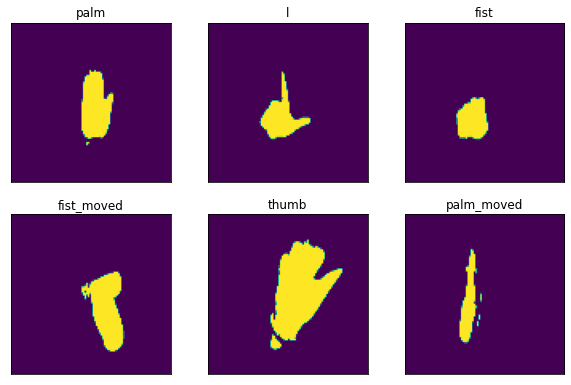

In [ ]:
#Graficamos una imagen por cada clase
plt.figure(1, figsize=(10,10))
i = 1750
k = 1
while i < 12001:
  plt.subplot(3,3,k)
  plt.imshow(images_arr[i][0])
  plt.xticks([])
  plt.yticks([])
  plt.title(CATEGORIES[label[i]][3:])
  print(i)
  k+=1
  i += 1750
plt.show()

In [ ]:
#Divido los bits, en parte imágen y parte datos
input_data = []
label = []
for X, y in images_arr:
    input_data.append(X)
    label.append(y)

In [ ]:
#Verificamos que el número de datos sea igual al de etiquetas
print('Size de datos', len(input_data))
print('Size de etiquetas', len(label))

Size de datos 12000
Size de etiquetas 12000


In [ ]:
#Número de elementos que tenemos por categoría:
k=0
cont=0
for x in range(len(label)):
  if label[x]==k:
    cont+=1
  else:
    print('Numero de elementos de la clase ',k,' son', cont )
    k+=1
    cont=1
print('Numero de elementos de la clase ',k,' son', cont )

  

Numero de elementos de la clase  0  son 2000
Numero de elementos de la clase  1  son 2000
Numero de elementos de la clase  2  son 2000
Numero de elementos de la clase  3  son 2000
Numero de elementos de la clase  4  son 2000
Numero de elementos de la clase  5  son 2000


In [ ]:
#Transformamos de lista a arreglo
input_data_arr = np.array(input_data)
label_arr = np.array(label)


In [ ]:
#Formato de datos y etiquetas
print(input_data_arr.shape)
print(label_arr.shape)

(12000, 100, 100)
(12000,)


In [ ]:
#Gauardamos datos y eiquetas
np.save('data',input_data_arr)
np.save('etiquetas',label_arr)

In [ ]:
#Normalizamos los datos
input_data_arr = input_data_arr/255.0 #Rescale

In [ ]:
#Observamos  un ejemplo de los datos normalizados
input_data_arr[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Convertimos las categorías en binarias
label_arr = keras.utils.to_categorical(label_arr, num_classes=6,dtype='i1')
label_arr[0] #observamos primer valor 

array([1, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
#Reformateamos los datos a 4D para trabajar con redes Convolucionales
input_data_arr.shape = (-1, IMG_SIZE, IMG_SIZE, 1)
input_data_arr.shape

(12000, 100, 100, 1)

In [ ]:
#Guardamos los datos y etiquetas
np.save('datos',input_data)
np.save('etiquetas',label)

In [ ]:
#Cargamos los datos guardados
datosc=np.load('/content/datos.npy')
labesc=np.load('/content/etiquetas.npy')
print('Datos y etiquetas cargadas' )

**CREACIÓN MODELO CONVOLUCIONAL**

In [ ]:
#Dividimos los datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(input_data_arr, label_arr, test_size = 0.3, random_state=0)

In [ ]:
#Creation of a basic neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=1,activation='relu',input_shape=(IMG_SIZE, IMG_SIZE,1)))

model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())#Pasamos a 1D para trabajar en Dense

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)


Training matrix shape (8400, 100, 100, 1)
Testing matrix shape (3600, 100, 100, 1)


In [ ]:
print("X_train original shape", x_train.shape)
print("X_train original shape", x_test.shape)
print("y_train original shape", y_train.shape)
print("y_train original shape", y_test.shape)

X_train original shape (8400, 100, 100, 1)
X_train original shape (3600, 100, 100, 1)
y_train original shape (8400, 6)
y_train original shape (3600, 6)


**Entrenamiento del modelo**

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=12, verbose=1,validation_data=(x_test, y_test))

Epoch 1/12
263/263 [==============================] - 5s 21ms/step - loss: 0.2549 - accuracy: 0.9135 - val_loss: 0.0156 - val_accuracy: 0.9939
Epoch 2/12
263/263 [==============================] - 5s 19ms/step - loss: 0.0241 - accuracy: 0.9911 - val_loss: 0.0057 - val_accuracy: 0.9994
Epoch 3/12
263/263 [==============================] - 5s 19ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 4/12
263/263 [==============================] - 5s 19ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 5/12
263/263 [==============================] - 5s 20ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0016 - val_accuracy: 0.9994
Epoch 6/12
263/263 [==============================] - 5s 20ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 7/12
263/263 [==============================] - 5s 20ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 7.4437e-04 - val_accuracy: 0.

**Resúmen del Modelo (Arquitectura)**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0

In [ ]:
model.save("modeltest3.h5")
print("Saved model to disk")

Saved model to disk


**Gráficas de Loss y Accuracy**

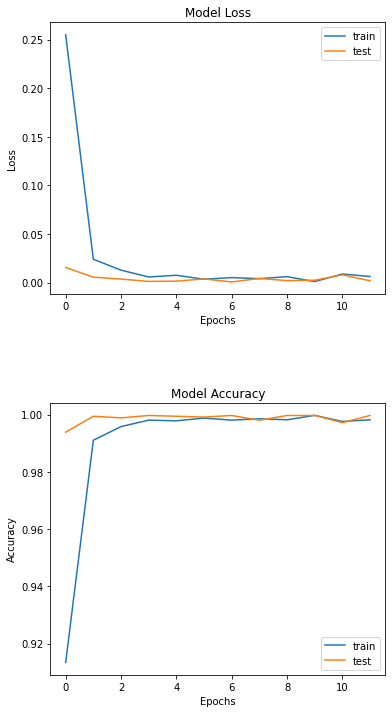

In [ ]:
fig = plt.figure(figsize=(6, 12))
fig.subplots_adjust(hspace=0.4, wspace=1)
plt.subplot(2,1,1)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.subplot(2,1,2)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#Probar el modelo
predicted_classes = np.argmax(model.predict(x_test), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test, axis=1))[0]

print(len(correct_indices))
print(len(incorrect_indices))

3599
1


**Matriz de Confusión**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[]

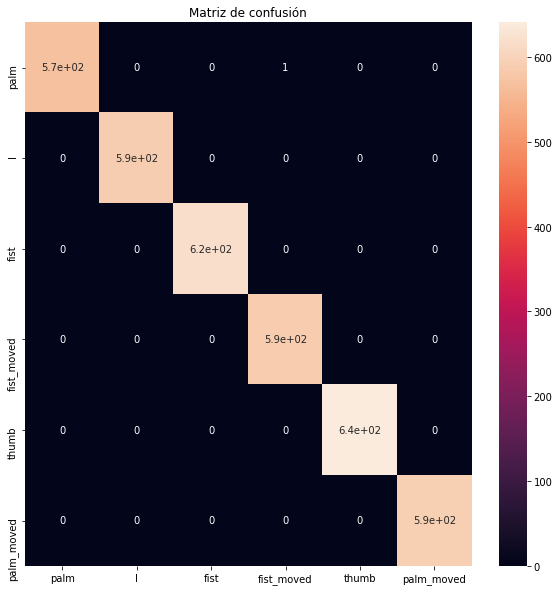

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.title('Matriz de confusión')
plt.plot()

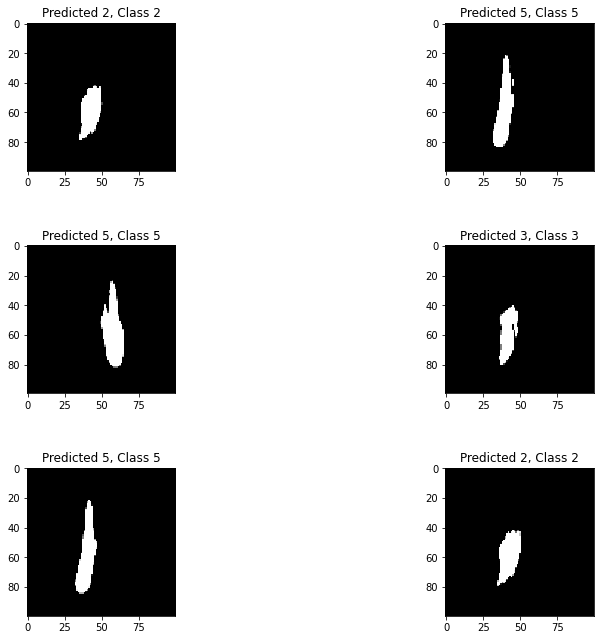

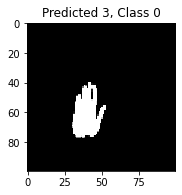

In [ ]:
#Graficar aciertos y errores
fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0)
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(4,2,i+1)
    plt.imshow(x_test[correct].reshape(IMG_SIZE,IMG_SIZE), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], np.argmax(y_test[correct])))
    
fig2=plt.figure(figsize=(15,15))
fig2.subplots_adjust(hspace=0.5, wspace=0)
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(4,2,i+1)
    plt.imshow(x_test[incorrect].reshape(IMG_SIZE,IMG_SIZE), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],np.argmax(y_test[incorrect])))

**Probar Modelo**

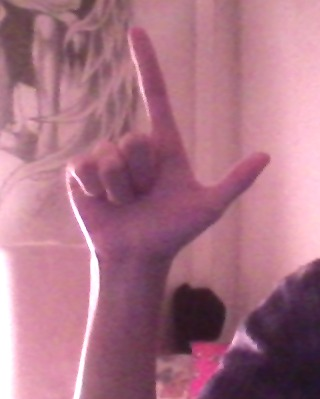

In [ ]:
#Cargamos imagen
img=cv2.imread('/content/test1.jpg')
#Mostramos imagen
cv2_imshow(img)


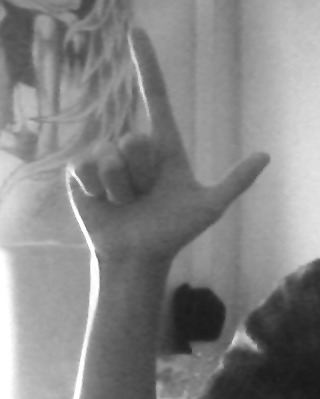

In [ ]:
#La leemos en formato gray
#Cargamos imagen
img=cv2.imread('/content/test1.jpg',cv2.IMREAD_GRAYSCALE)
#Mostramos imagen
cv2_imshow(img)

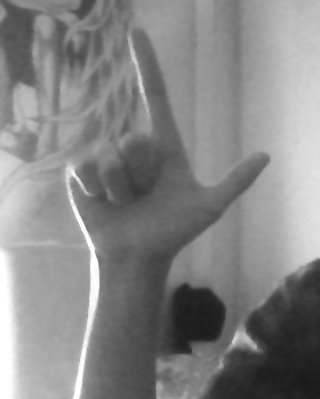

In [ ]:
#Tratamos la imagen
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2_imshow(img)


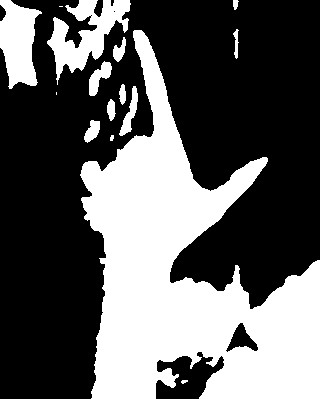

In [ ]:
#B/N Threshold
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(img,(5,5),0)
ret,thresh = cv2.threshold(imgray,120,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)


In [ ]:
image_data=(cv2.resize(thresh,(IMG_SIZE,IMG_SIZE)))
images_arr = np.array(image_data)
images_arr = images_arr/255.0
images_arr.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

prediccion = np.argmax(model.predict(images_arr), axis=1)
print(prediccion)
print(CATEGORIES[prediccion[0]])

[0]
01_palm


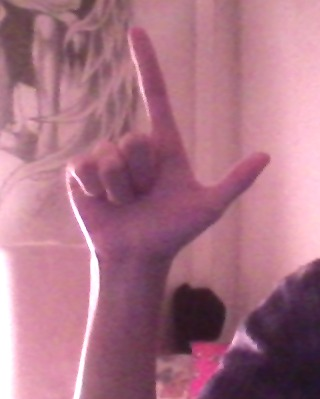

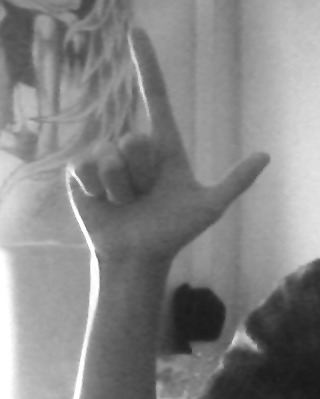

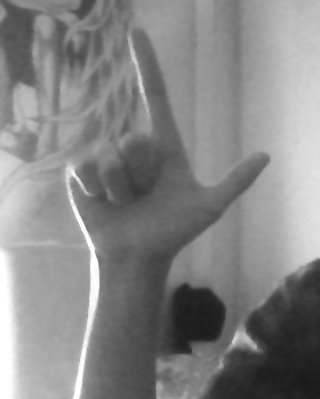

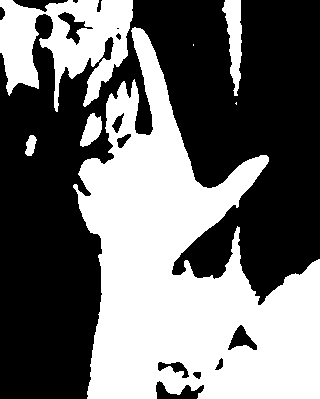

[4]
05_thumb


In [ ]:
#Cargamos imagen
img=cv2.imread('/content/test1.jpg')
#Mostramos imagen
cv2_imshow(img)
#La leemos en formato gray
#Cargamos imagen
img=cv2.imread('/content/test1.jpg',cv2.IMREAD_GRAYSCALE)
#Mostramos imagen
cv2_imshow(img)
#Tratamos la imagen
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2_imshow(img)
#B/N Threshold
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(img,(5,5),0)
ret,thresh = cv2.threshold(imgray,130,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)
image_data=(cv2.resize(thresh,(IMG_SIZE,IMG_SIZE)))
images_arr = np.array(image_data)
images_arr = images_arr/255.0
images_arr.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

prediccion = np.argmax(model.predict(images_arr), axis=1)
print(prediccion)
print(CATEGORIES[prediccion[0]])

**Cargar Modelo**

In [ ]:
from keras.models import load_model
model= load_model( "/content/drive/My Drive/modeltest3.h5")
print('Modelo Cargado')

Modelo Cargado


In [ ]:
#Borrar Sample Data
import glob
import os
files = glob.glob('/content/*.*')  #seleccionar todos los ficheros png del directorio output
for f in files:
	os.remove(f) 

**Probamos con un video**

In [ ]:
#CARGARMOS EL VIDEO
cap = cv2.VideoCapture('/content/drive/My Drive/WhatsApp Video 2020-09-20 at 1.43.31 AM (online-video-cutter.com).mp4')
print('Video cargado')

Video cargado


In [ ]:
# determinar el número de frames de la secuencia de vídeo	
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( 'Número total de frames',length )

Número total de frames 423


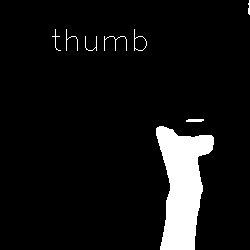

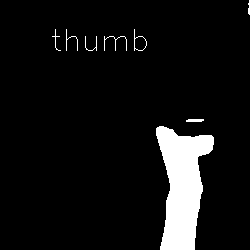

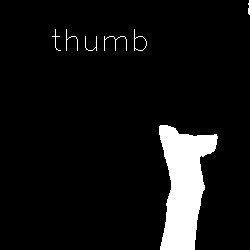

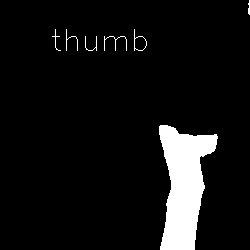

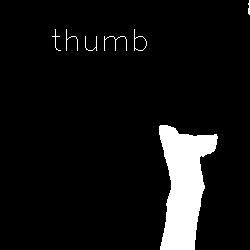

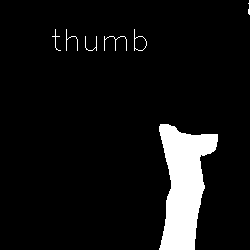

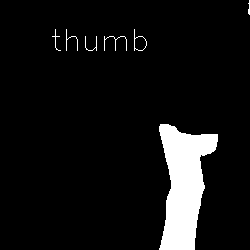

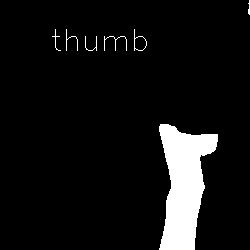

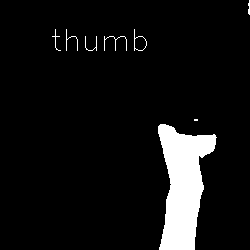

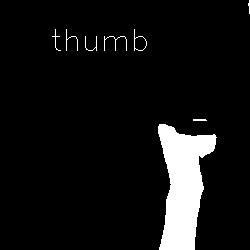

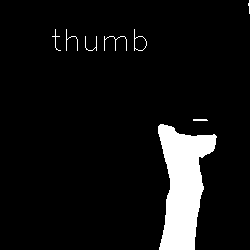

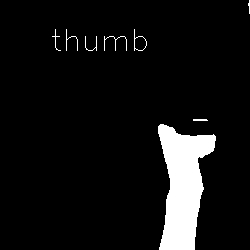

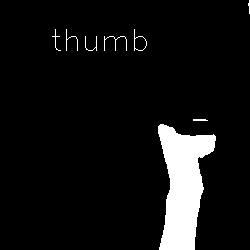

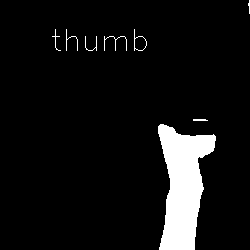

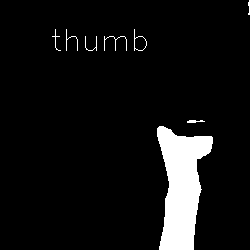

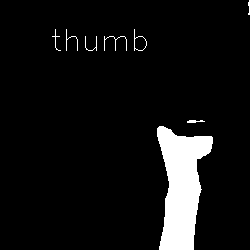

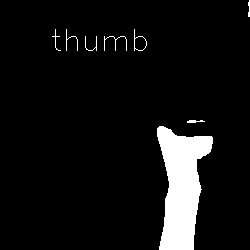

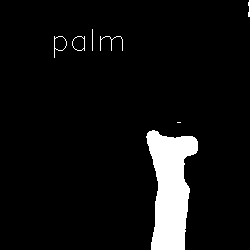

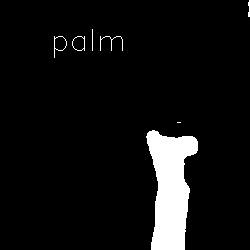

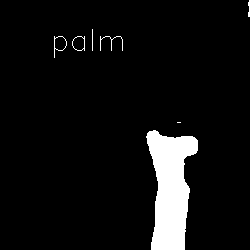

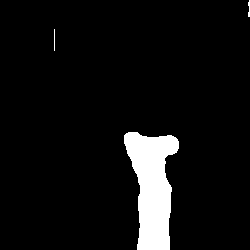

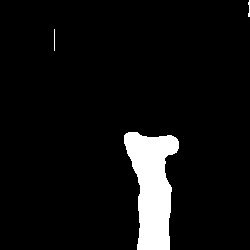

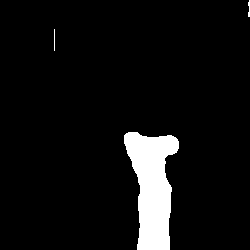

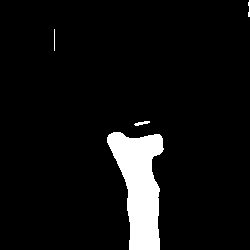

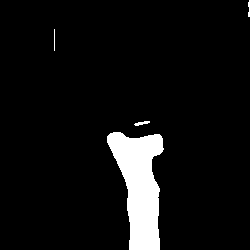

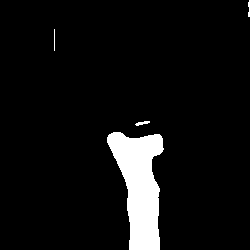

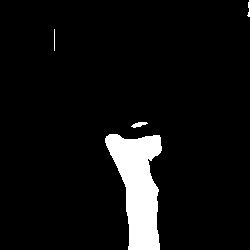

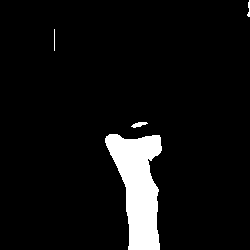

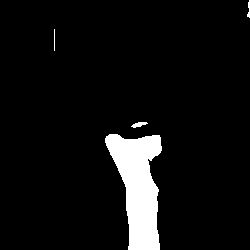

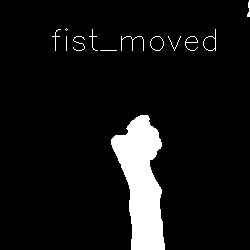

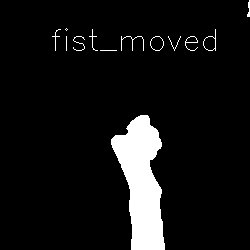

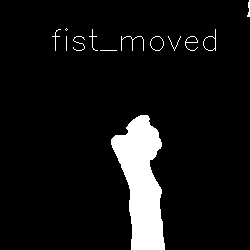

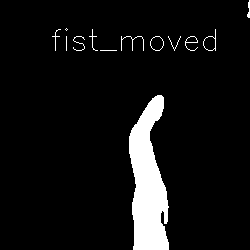

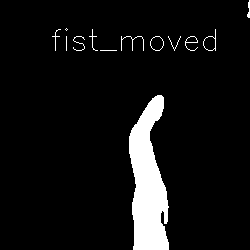

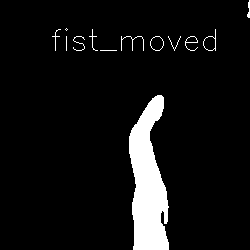

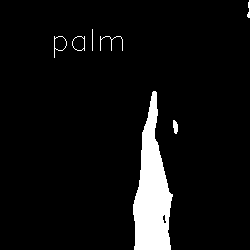

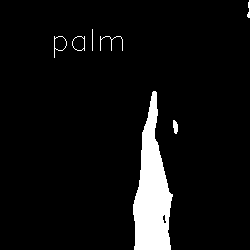

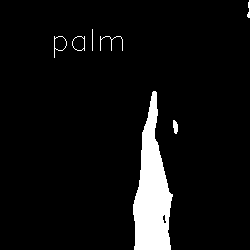

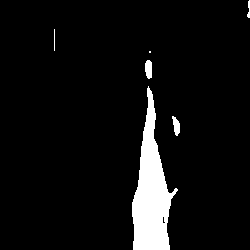

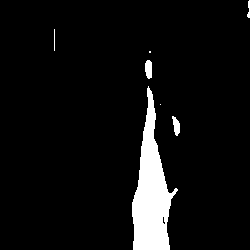

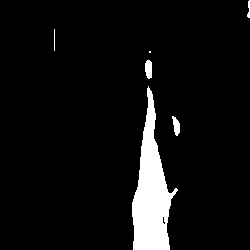

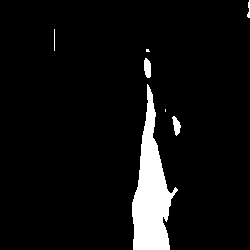

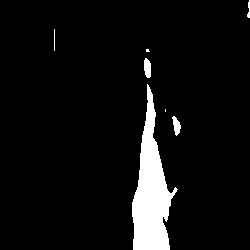

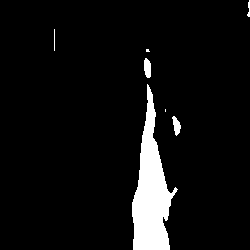

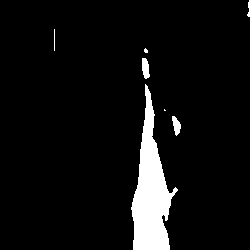

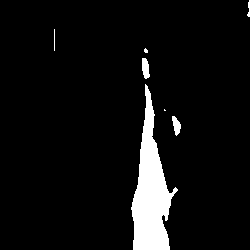

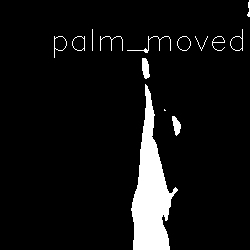

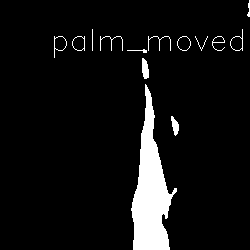

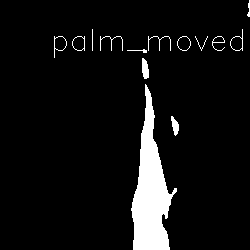

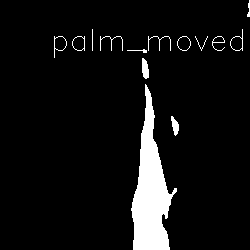

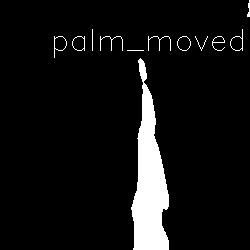

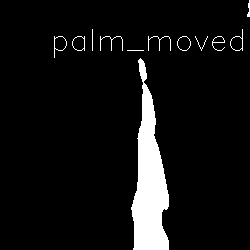

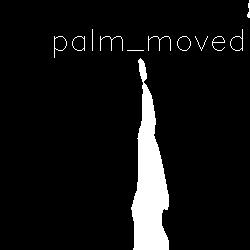

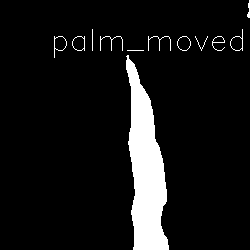

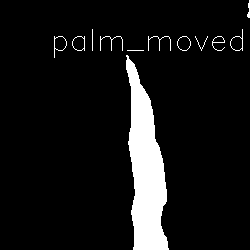

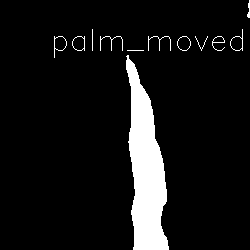

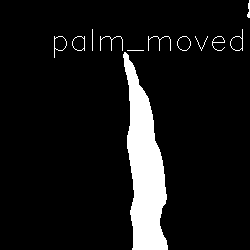

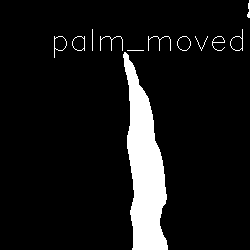

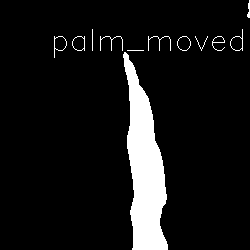

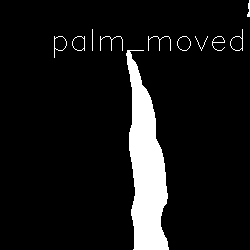

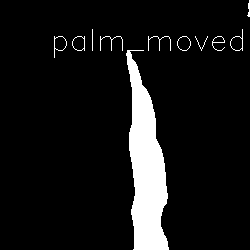

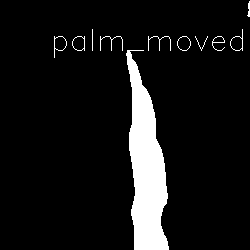

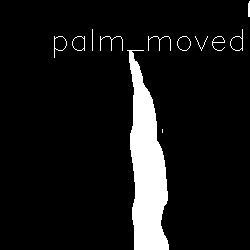

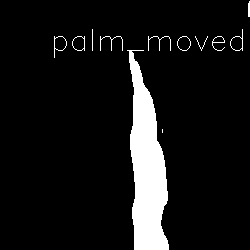

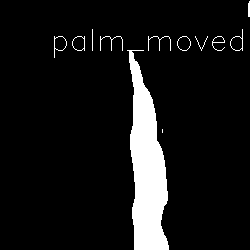

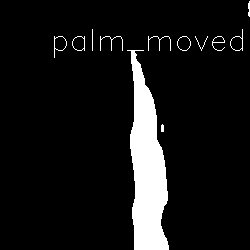

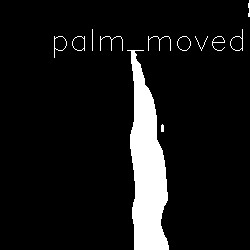

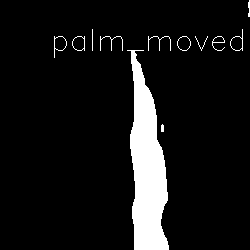

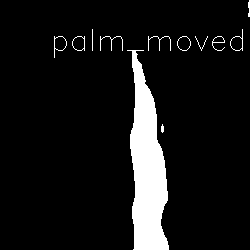

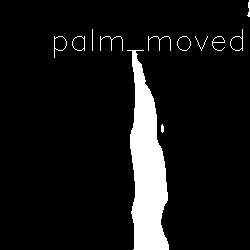

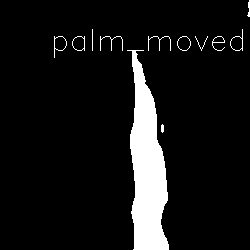

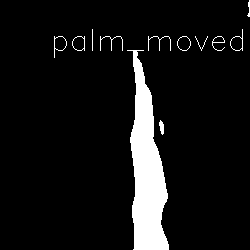

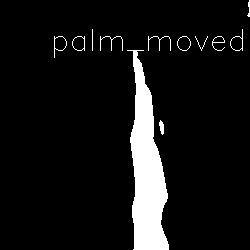

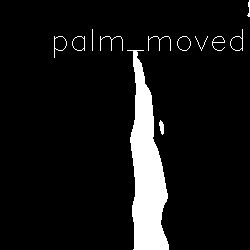

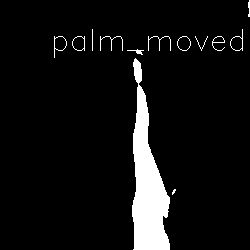

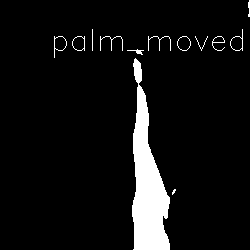

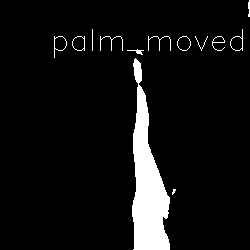

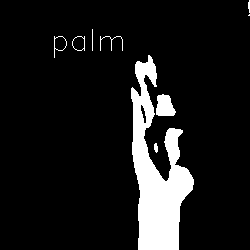

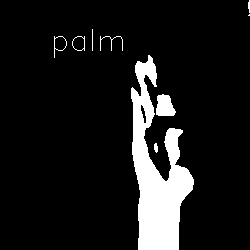

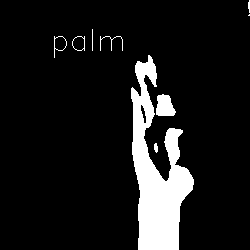

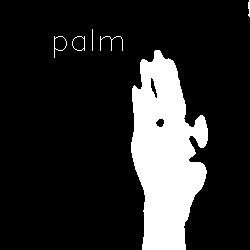

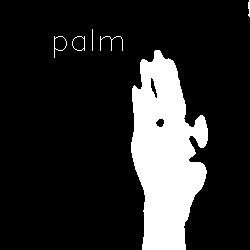

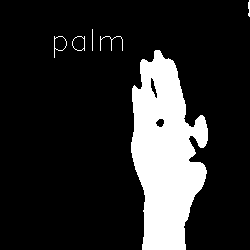

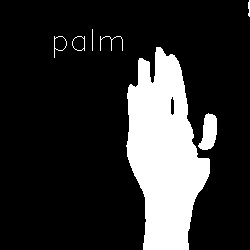

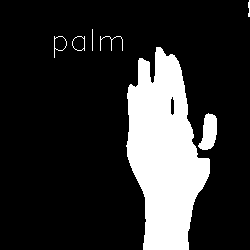

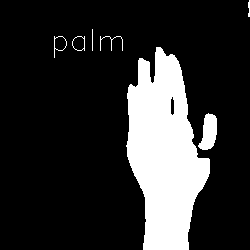

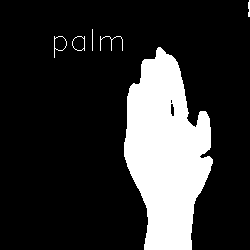

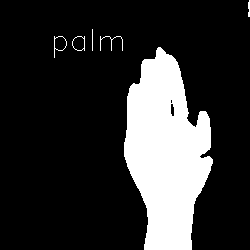

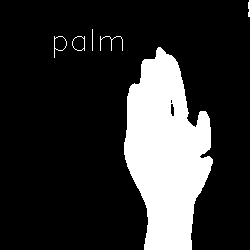

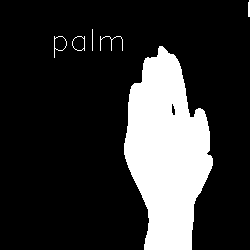

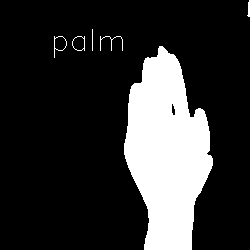

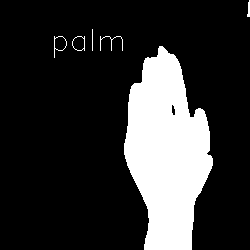

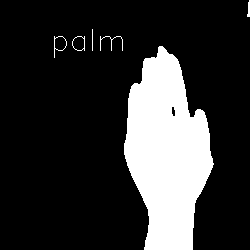

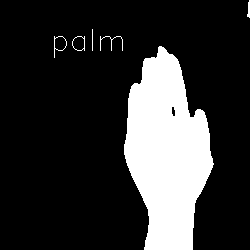

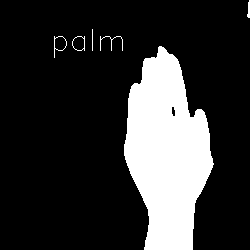

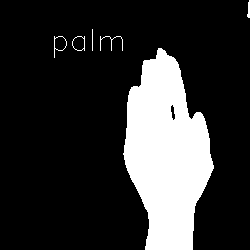

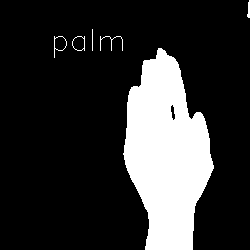

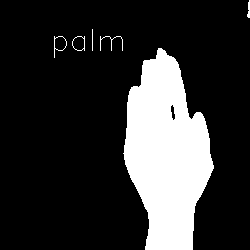

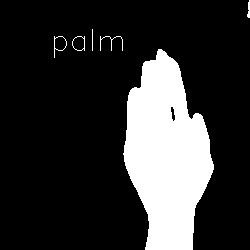

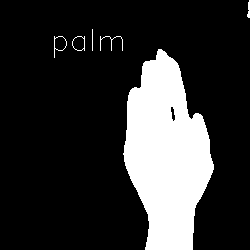

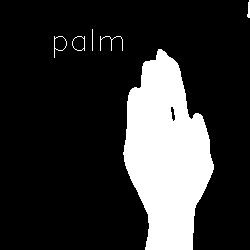

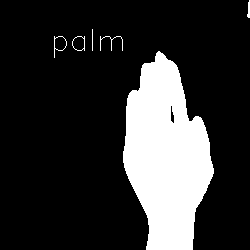

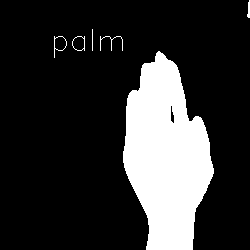

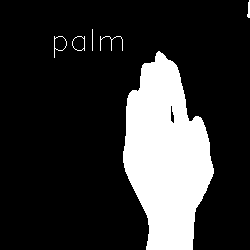

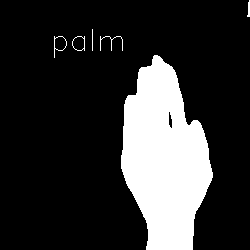

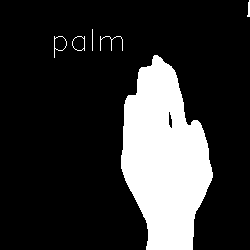

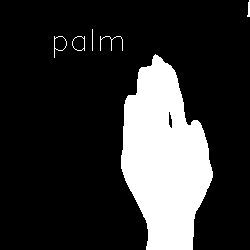

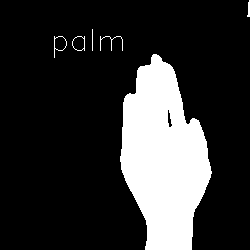

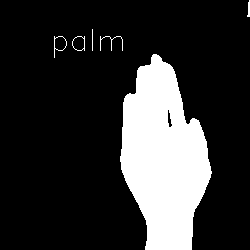

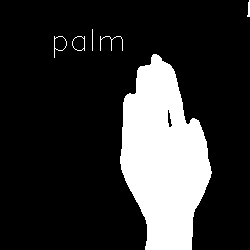

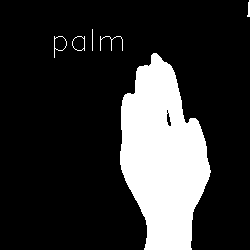

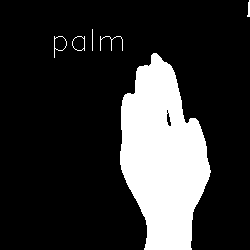

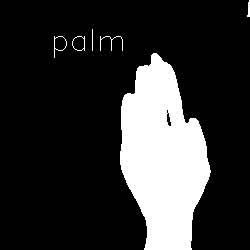

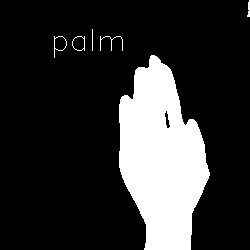

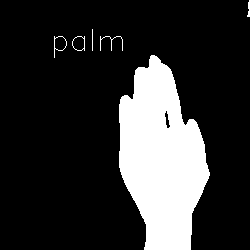

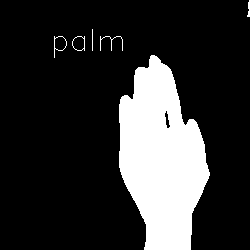

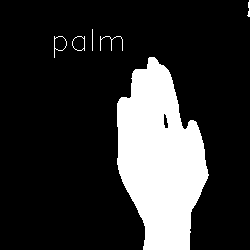

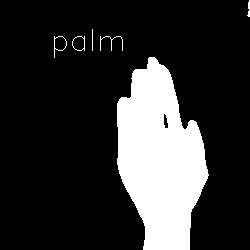

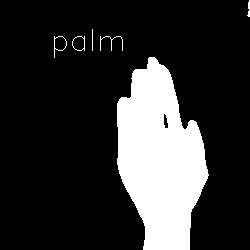

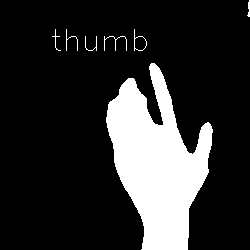

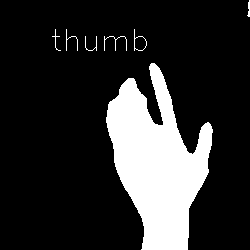

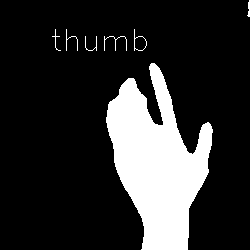

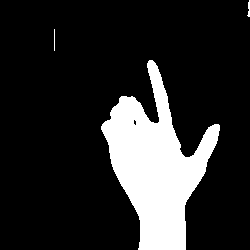

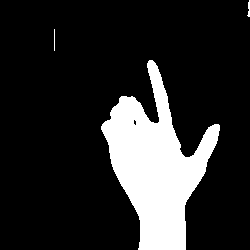

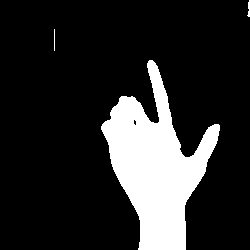

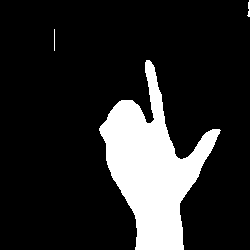

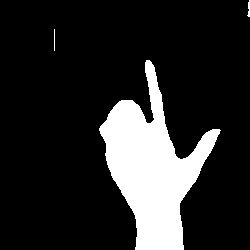

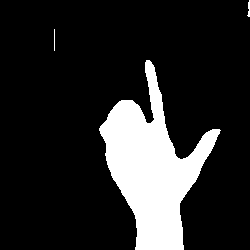

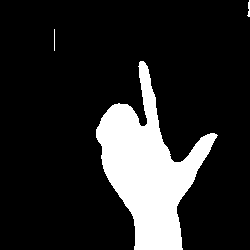

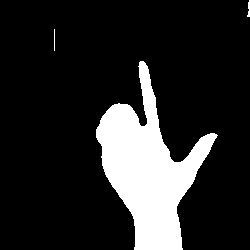

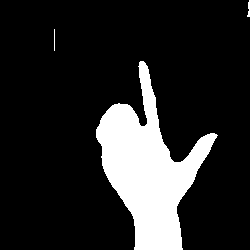

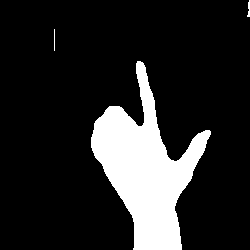

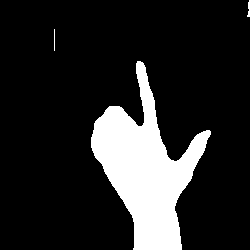

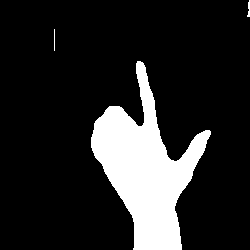

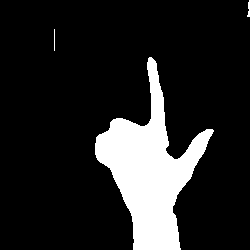

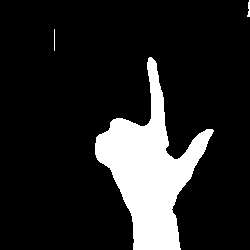

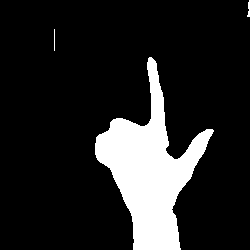

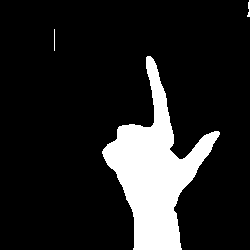

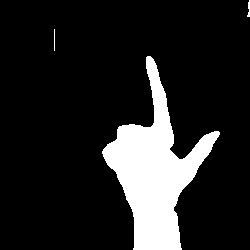

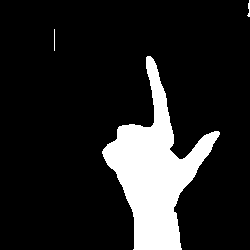

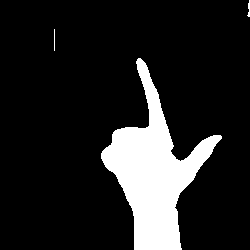

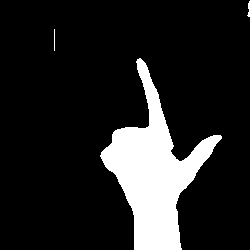

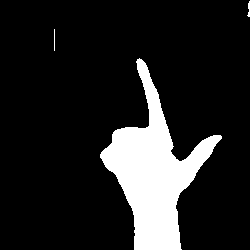

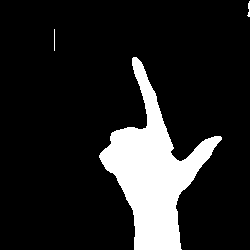

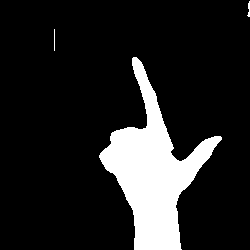

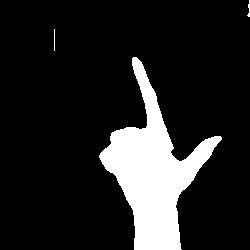

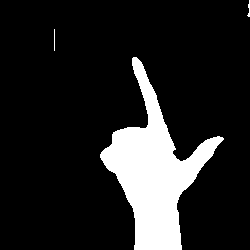

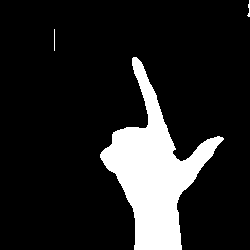

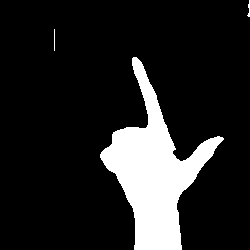

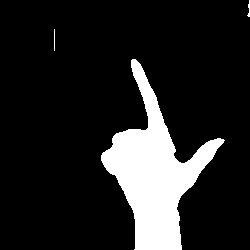

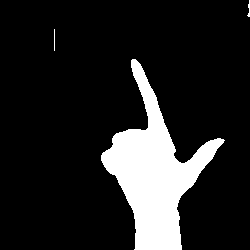

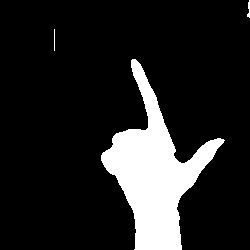

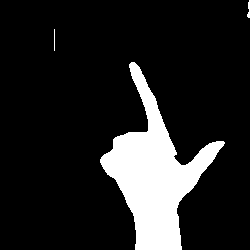

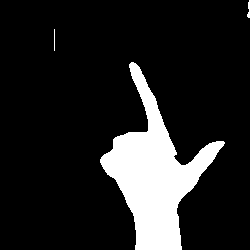

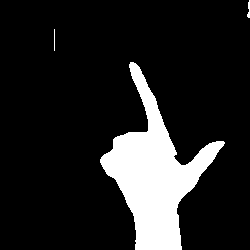

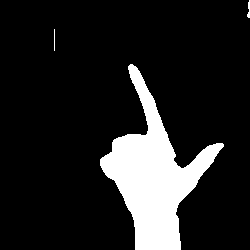

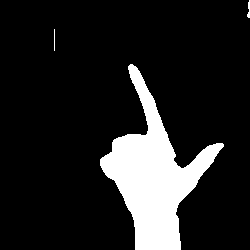

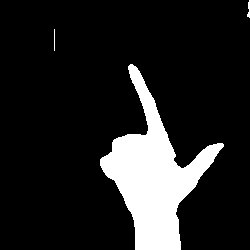

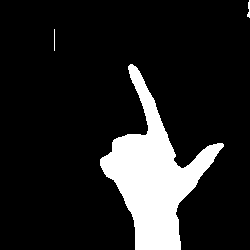

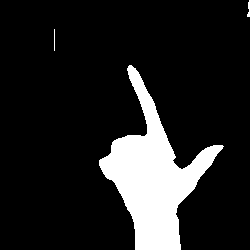

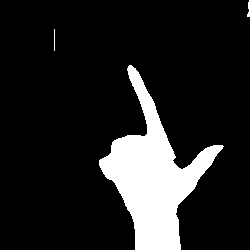

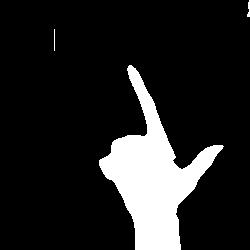

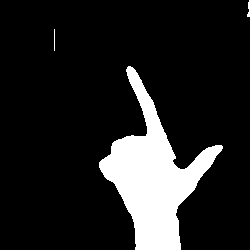

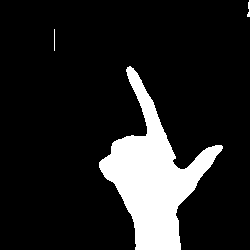

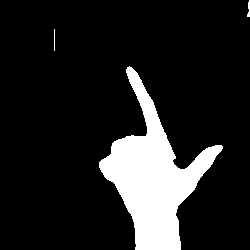

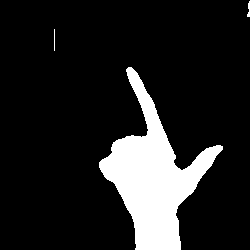

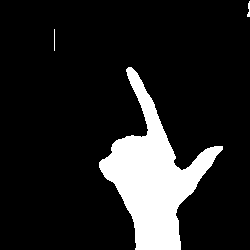

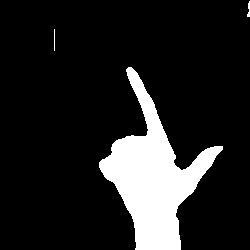

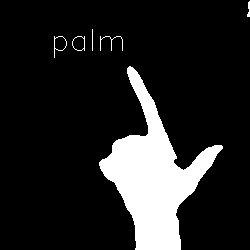

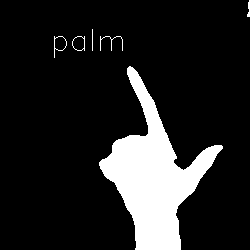

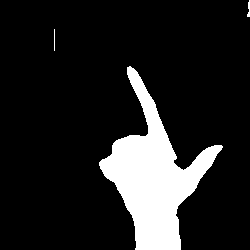

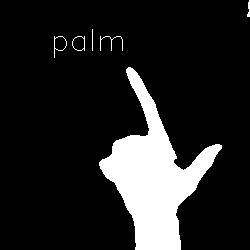

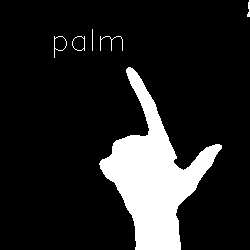

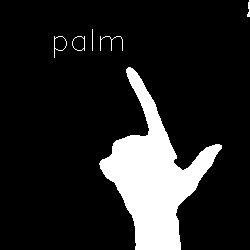

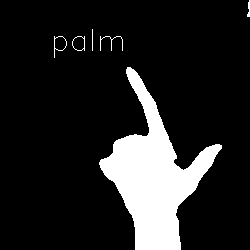

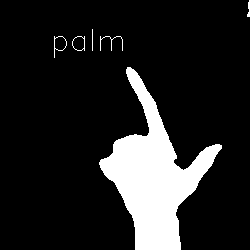

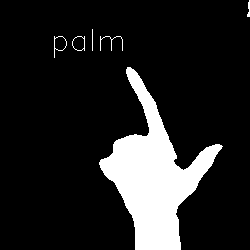

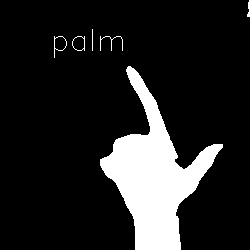

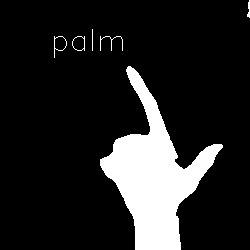

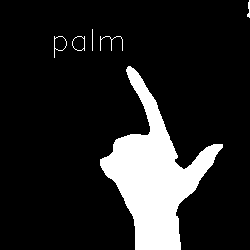

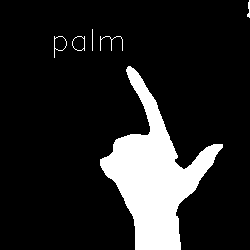

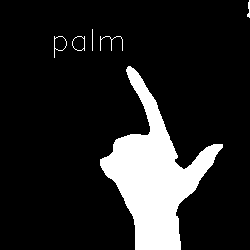

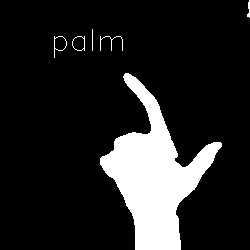

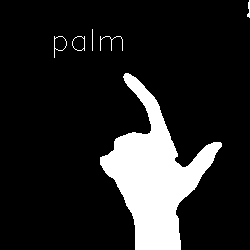

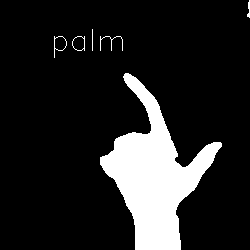

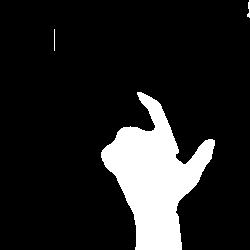

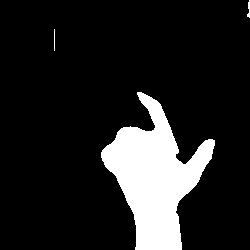

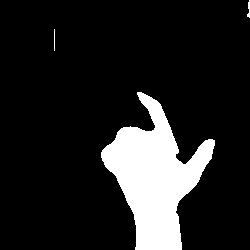

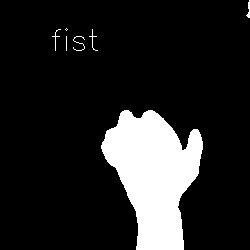

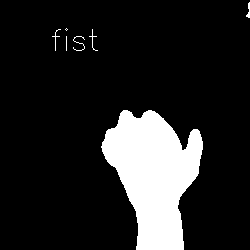

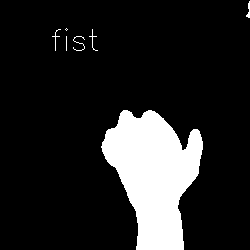

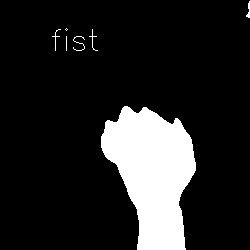

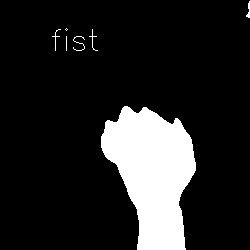

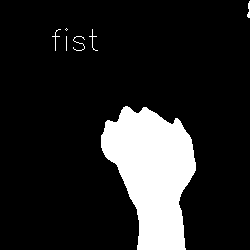

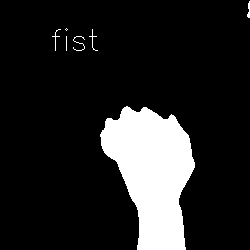

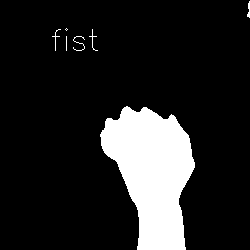

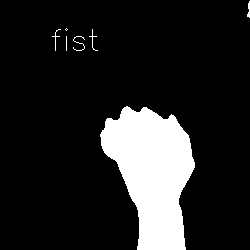

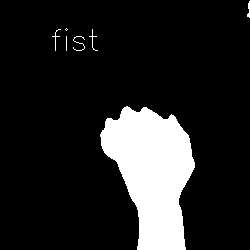

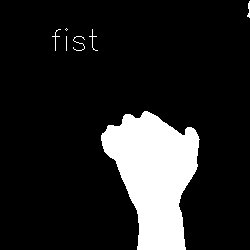

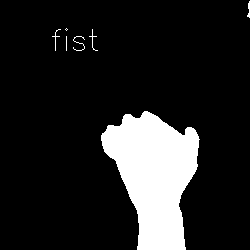

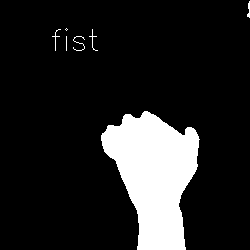

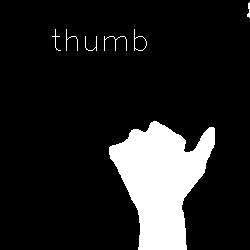

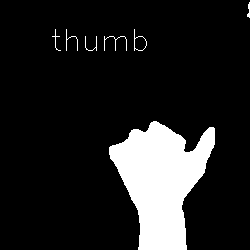

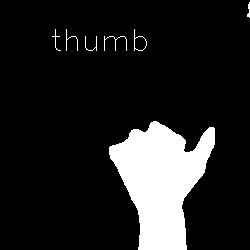

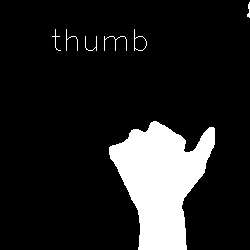

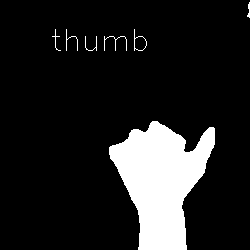

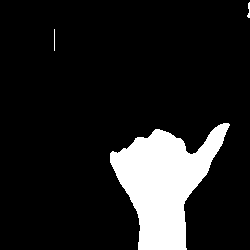

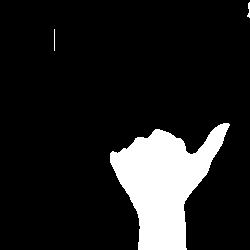

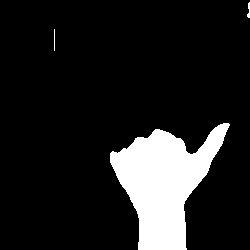

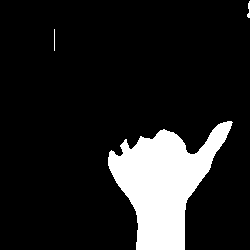

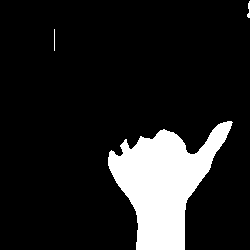

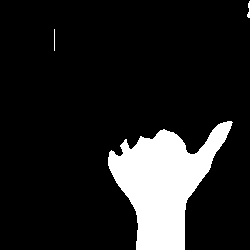

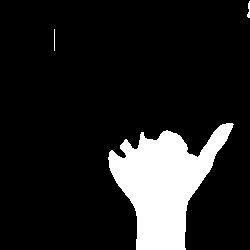

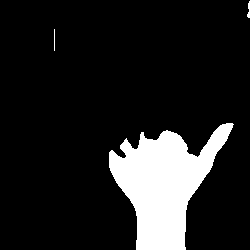

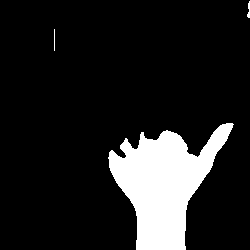

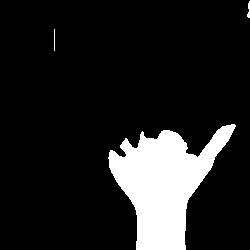

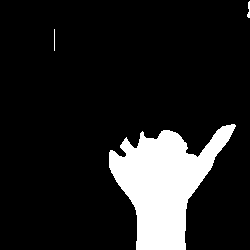

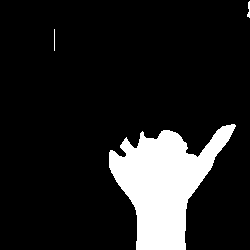

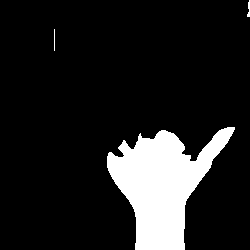

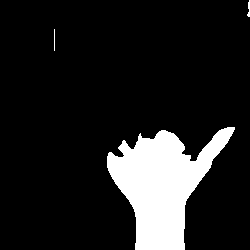

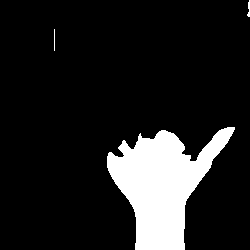

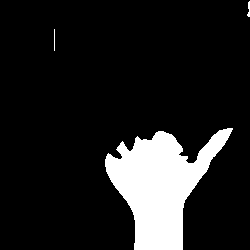

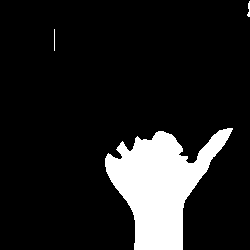

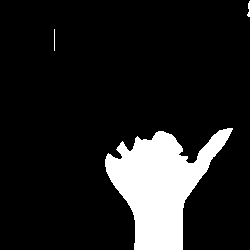

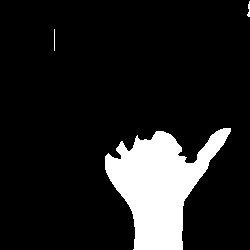

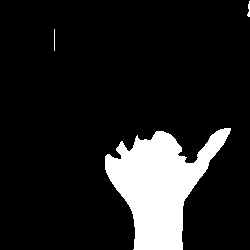

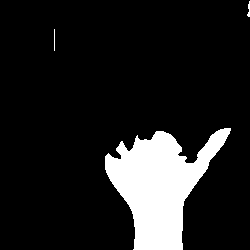

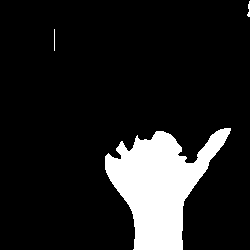

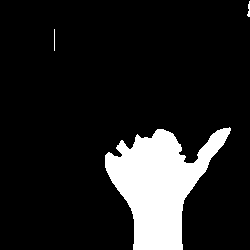

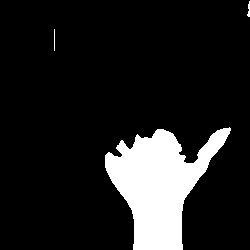

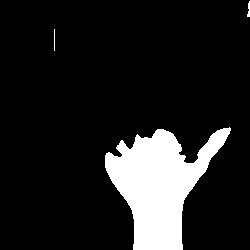

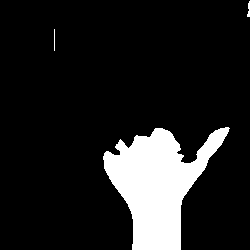

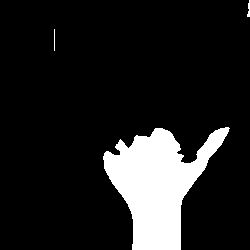

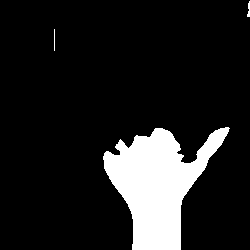

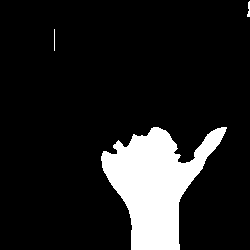

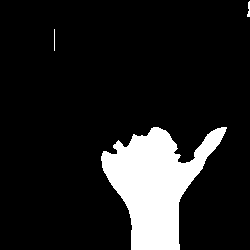

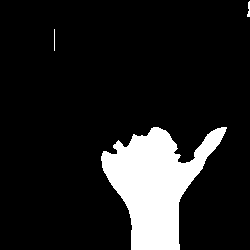

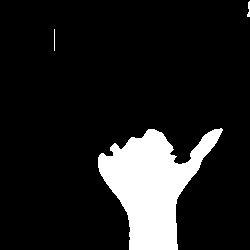

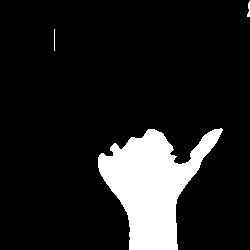

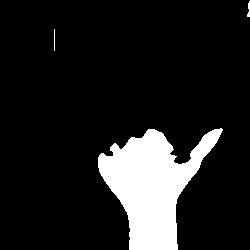

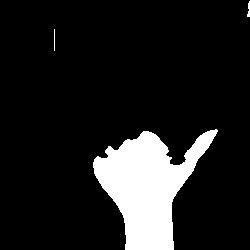

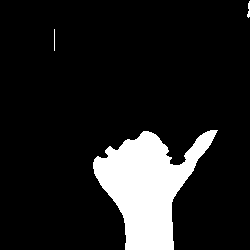

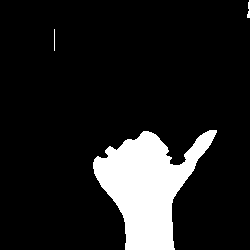

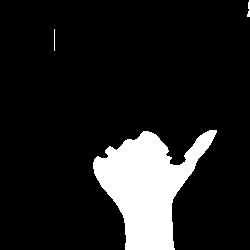

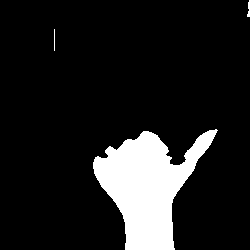

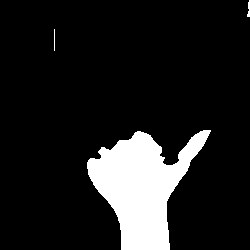

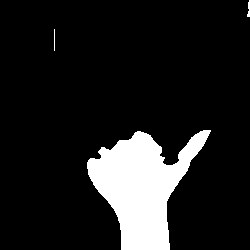

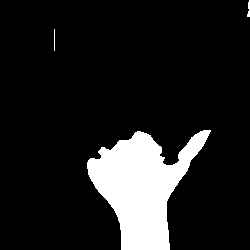

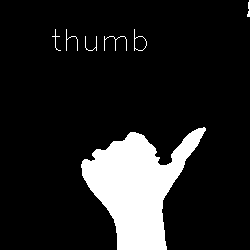

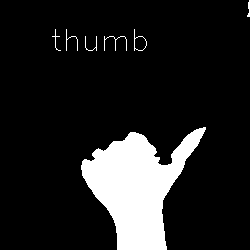

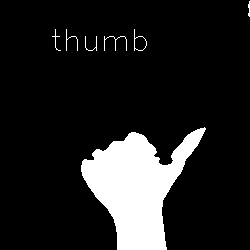

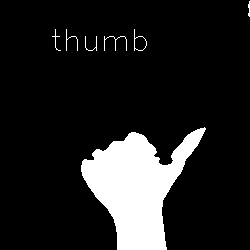

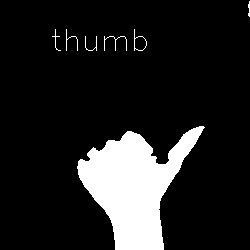

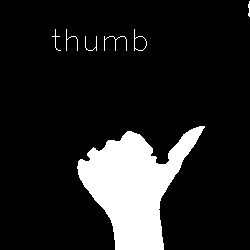

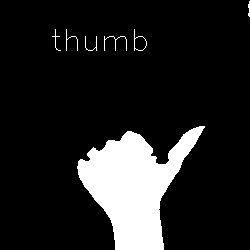

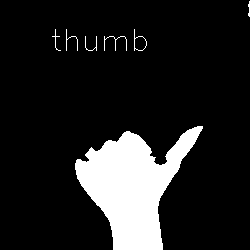

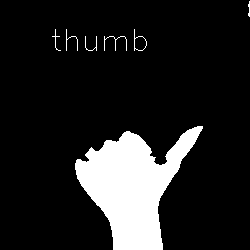

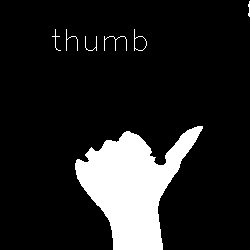

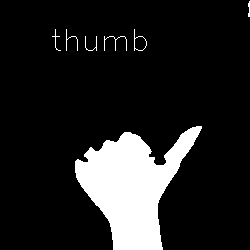

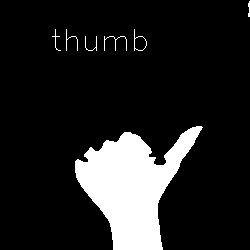

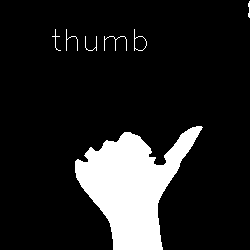

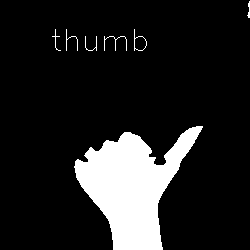

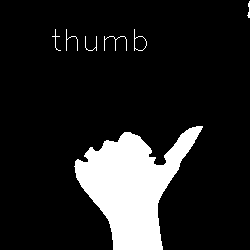

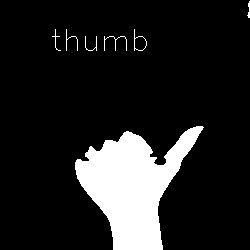

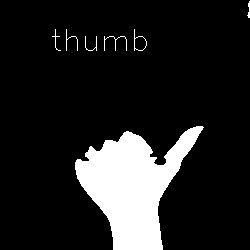

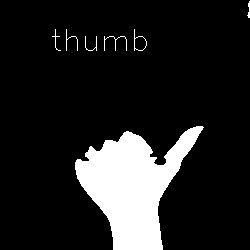

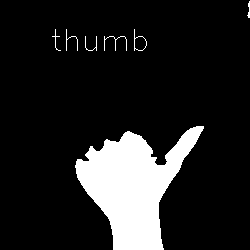

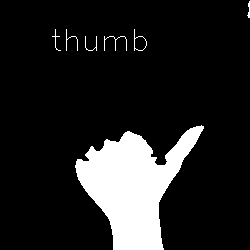

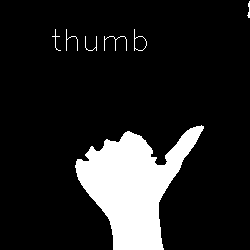

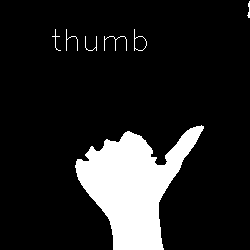

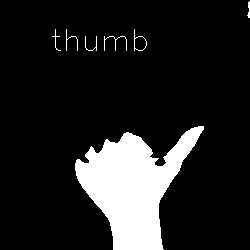

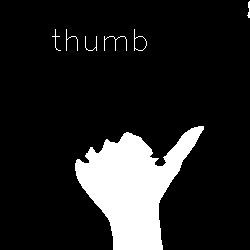

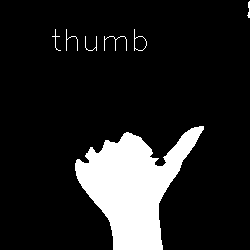

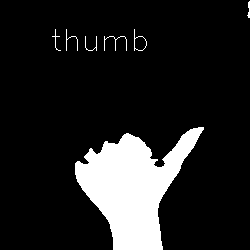

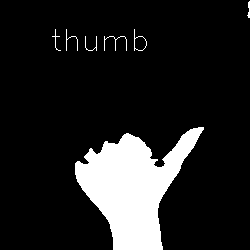

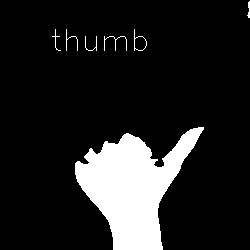

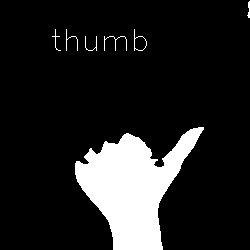

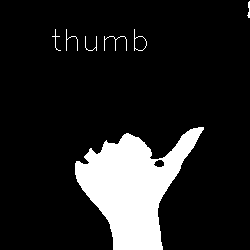

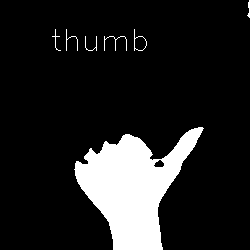

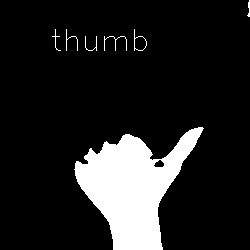

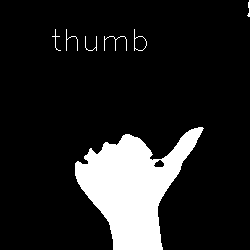

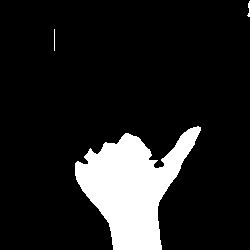

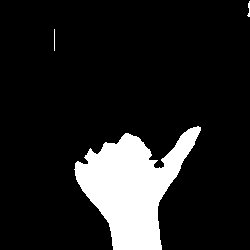

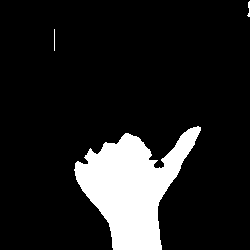

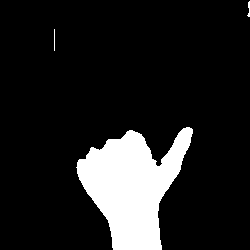

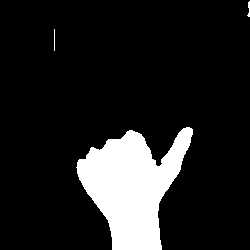

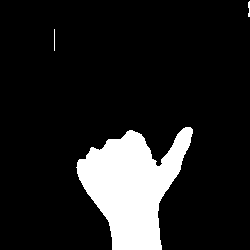

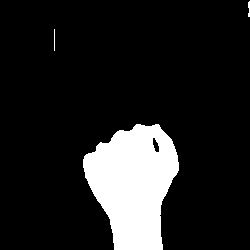

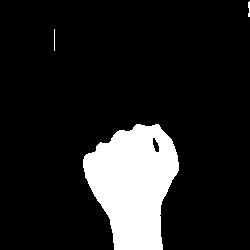

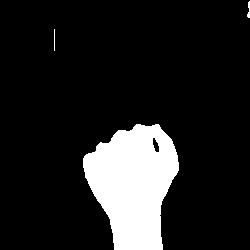

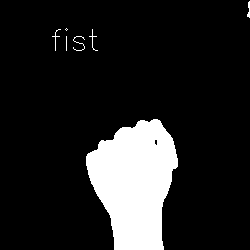

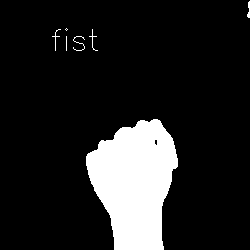

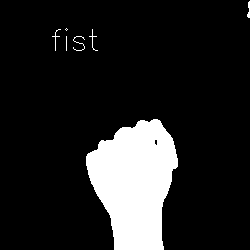

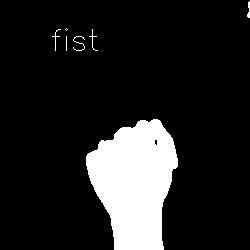

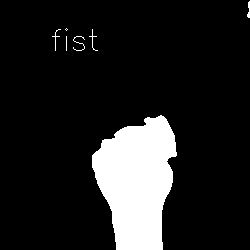

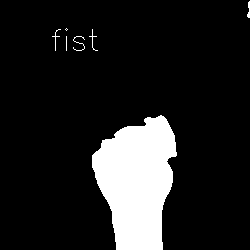

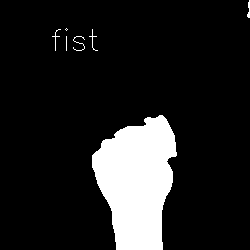

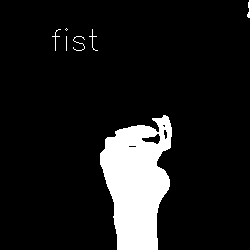

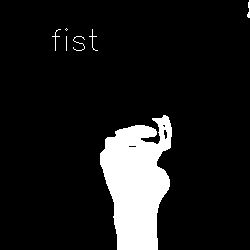

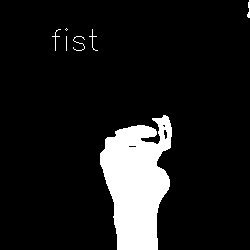

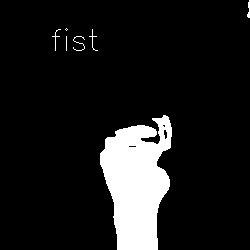

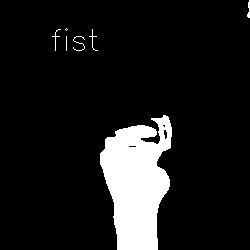

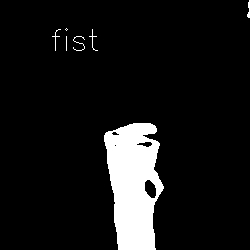

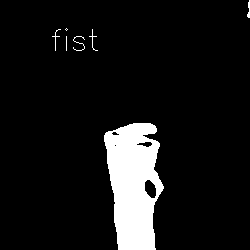

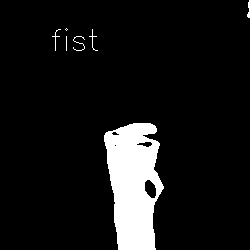

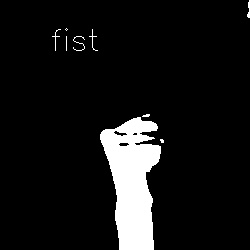

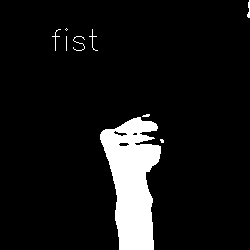

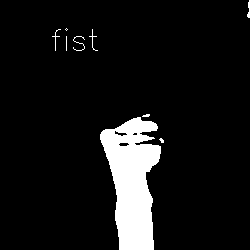

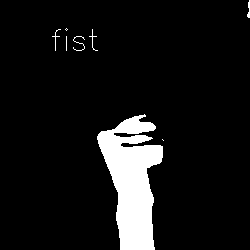

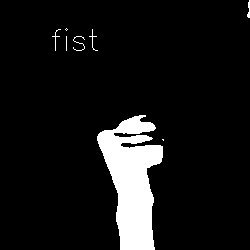

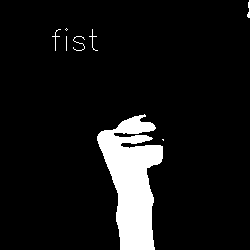

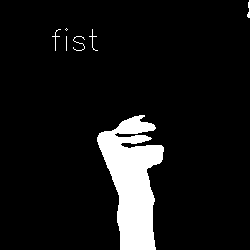

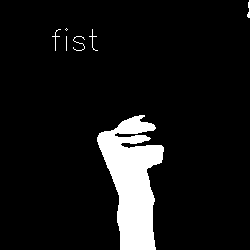

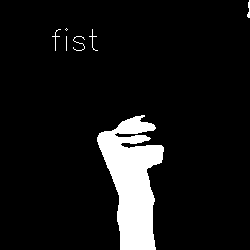

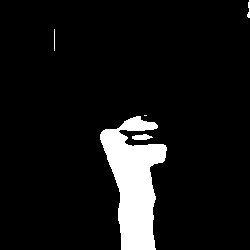

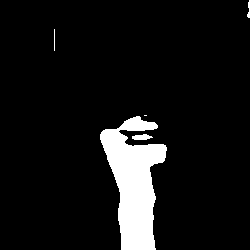

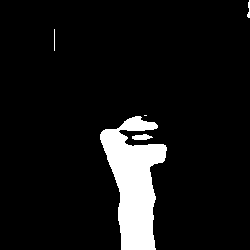

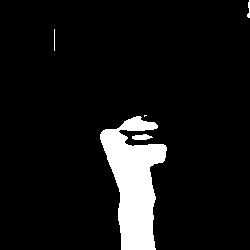

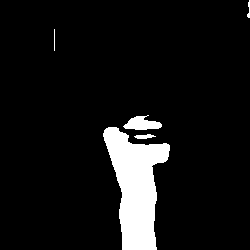

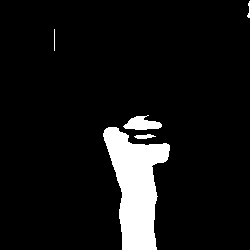

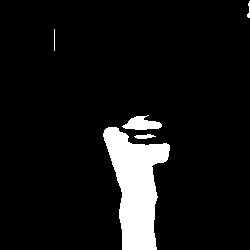

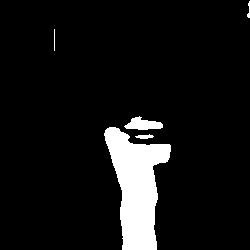

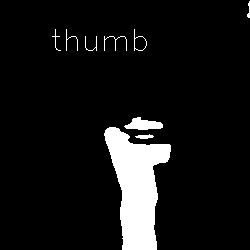

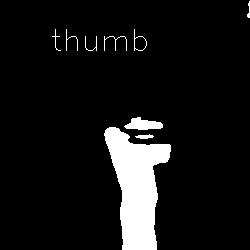

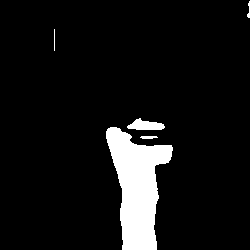

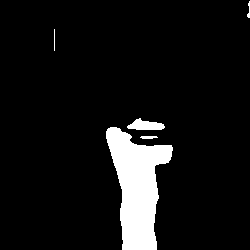

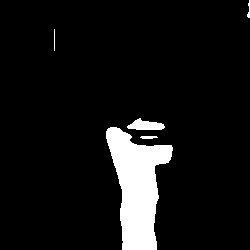

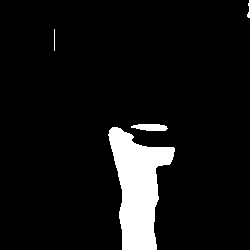

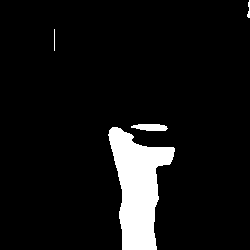

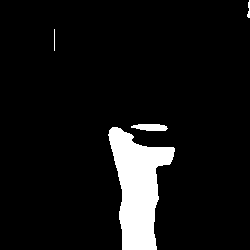

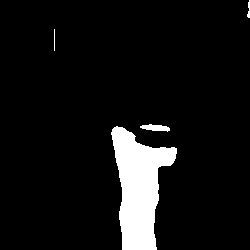

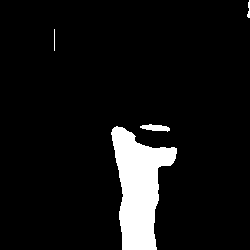

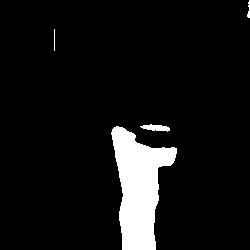

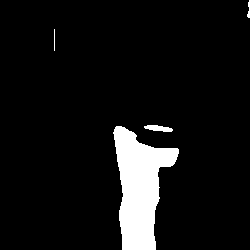

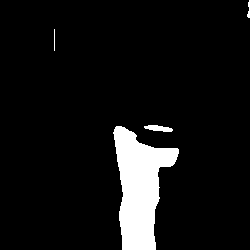

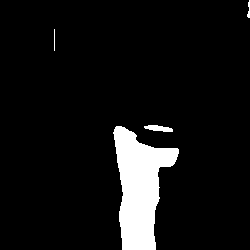

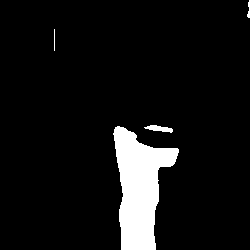

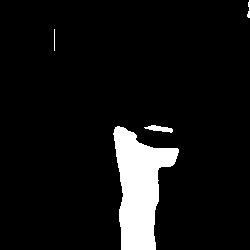

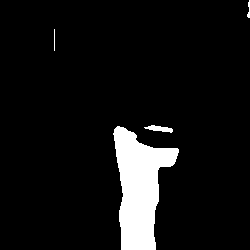

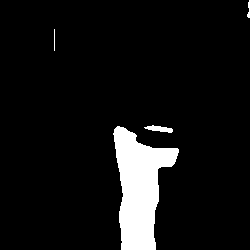

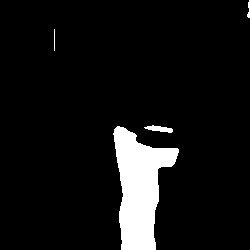

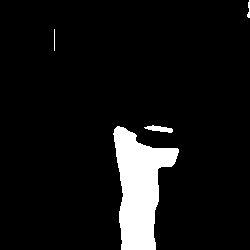

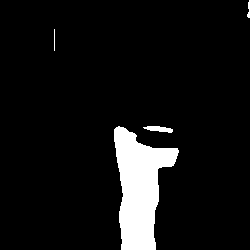

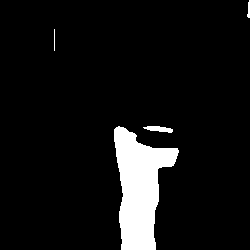

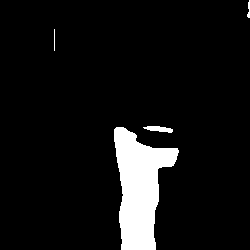

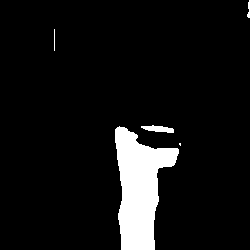

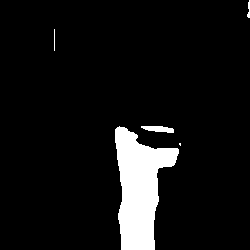

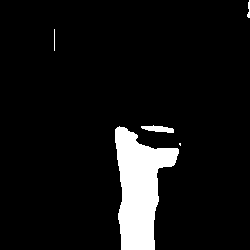

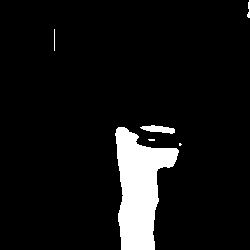

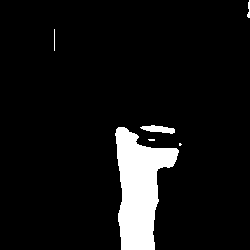

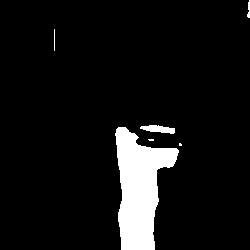

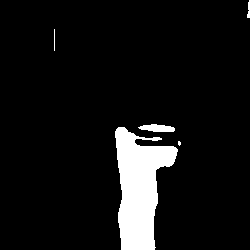

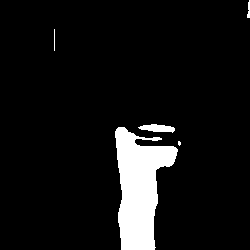

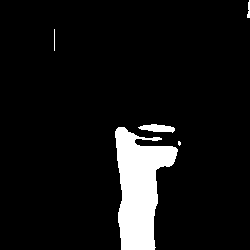

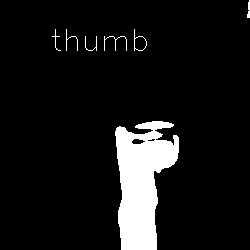

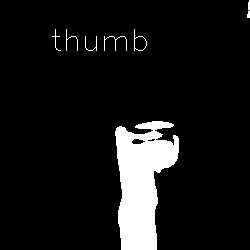

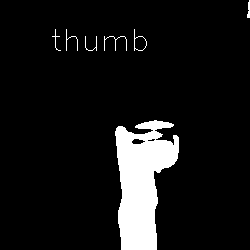

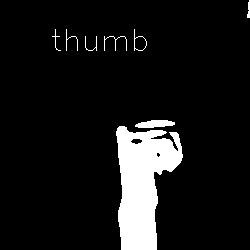

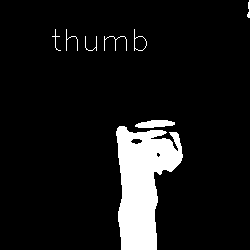

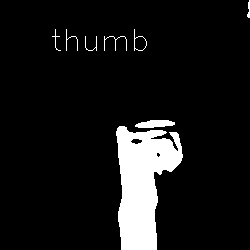

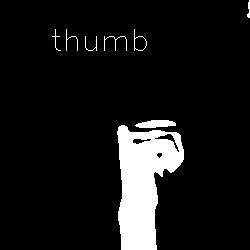

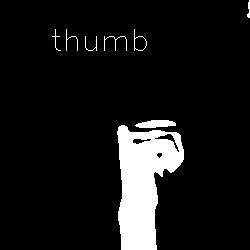

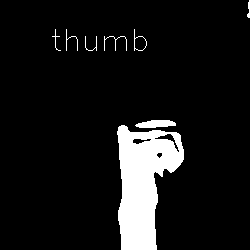

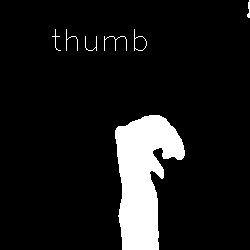

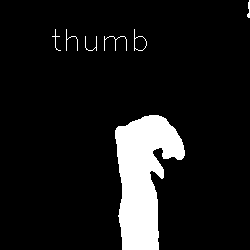

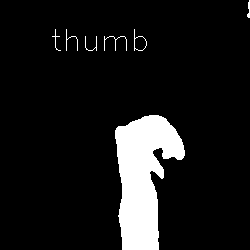

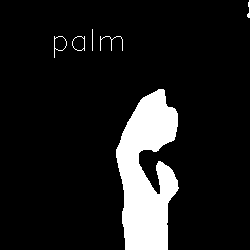

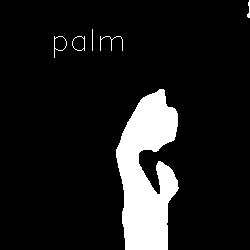

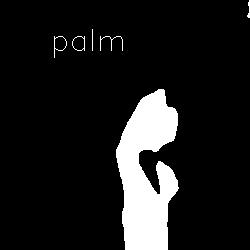

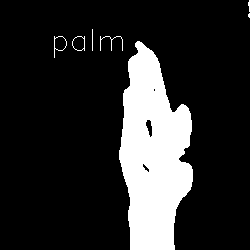

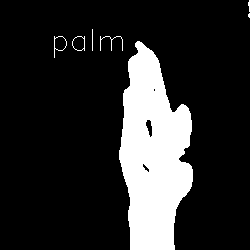

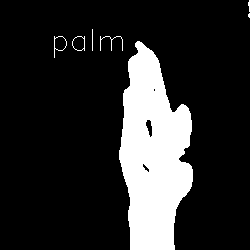

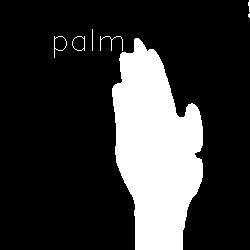

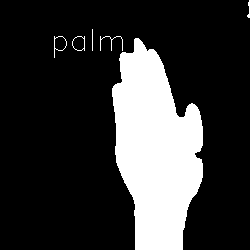

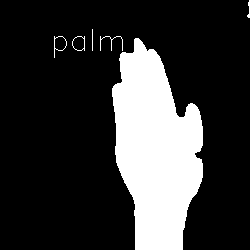

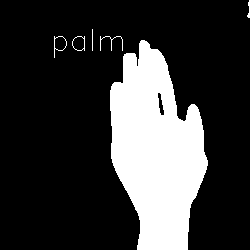

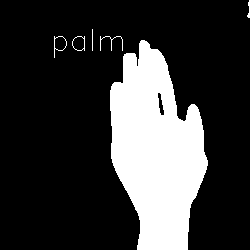

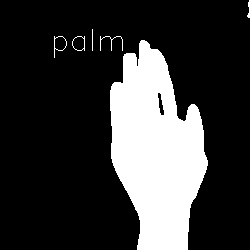

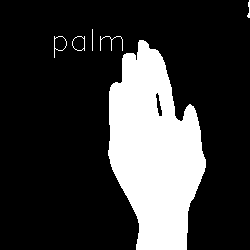

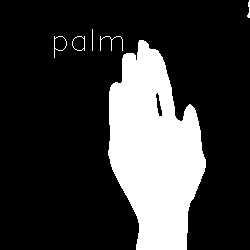

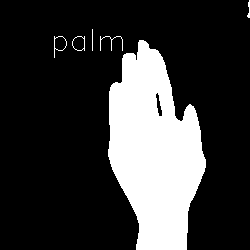

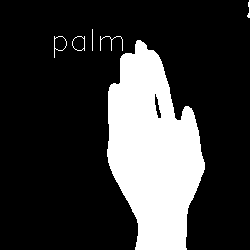

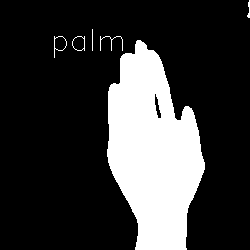

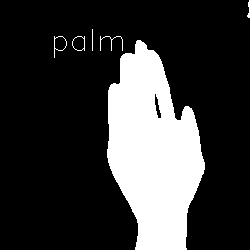

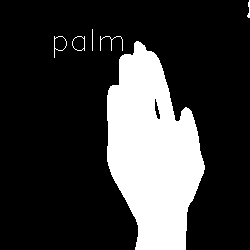

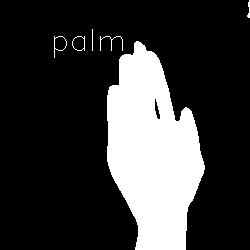

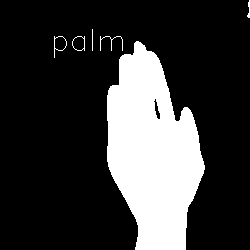

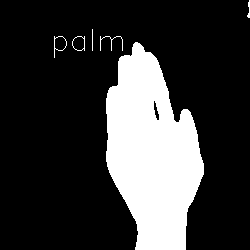

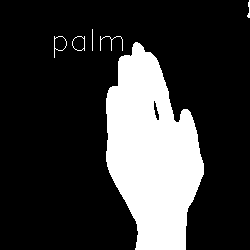

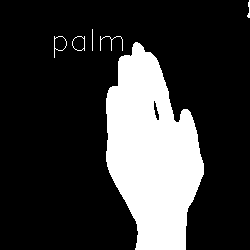

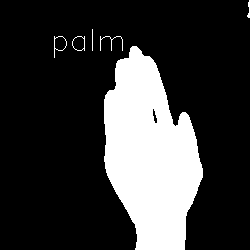

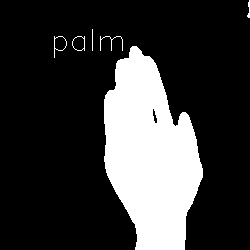

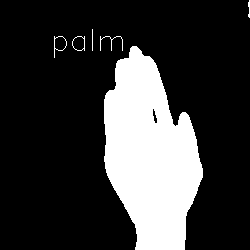

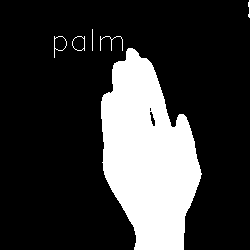

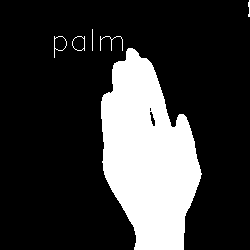

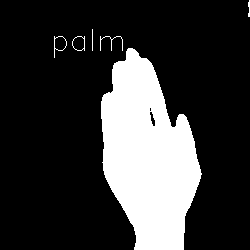

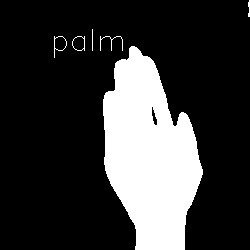

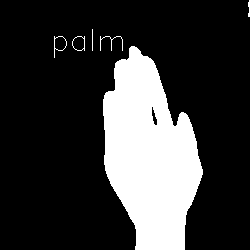

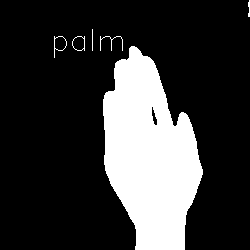

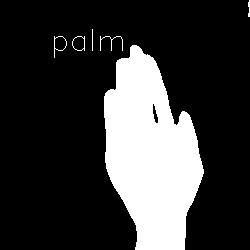

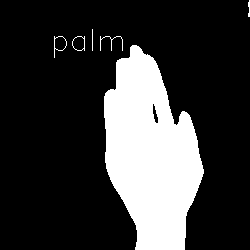

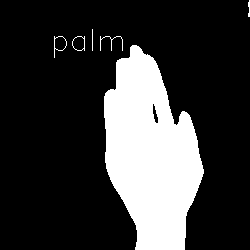

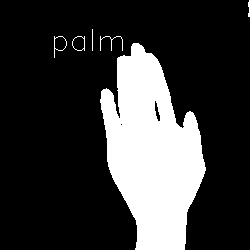

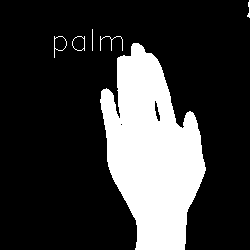

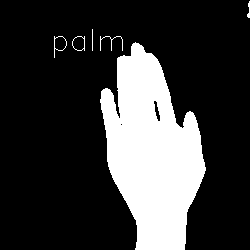

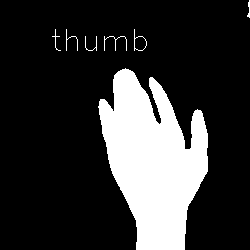

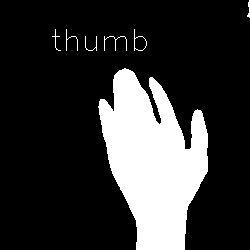

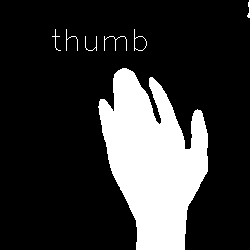

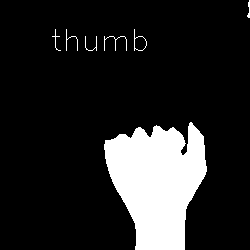

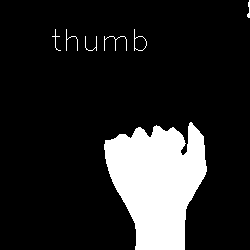

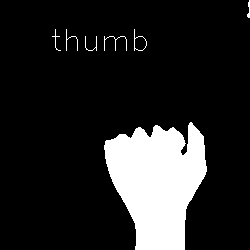

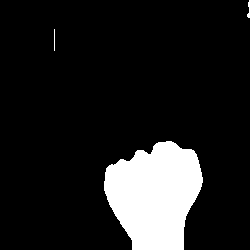

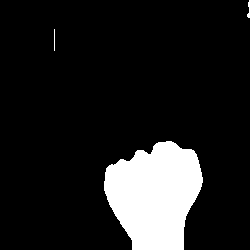

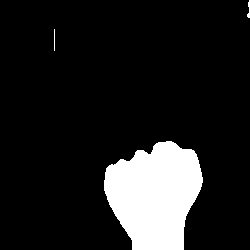

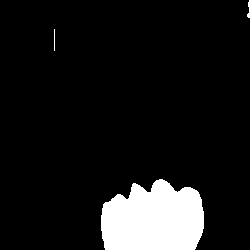

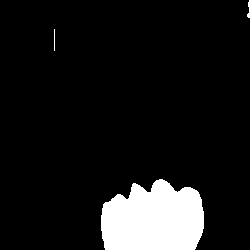

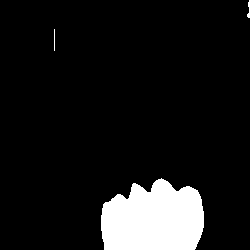

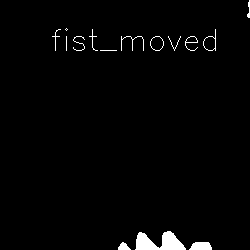

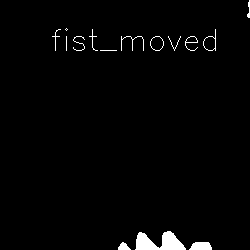

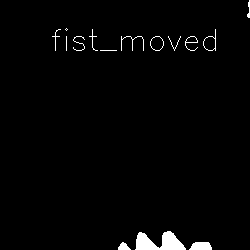

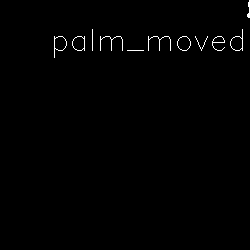

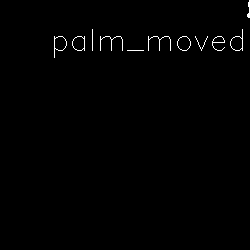

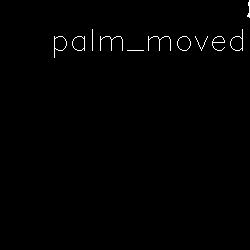

In [ ]:
#Video salida
salida= '/content/salida4.mp4'
writer=None
#Categorias de las fotos
CATEGORIES=[ "palm","l","fist","fist_moved","thumb","palm_moved"]
#Establecemos el size de imagen con el que trabajaremos
IMG_SIZE=100
indiceframes=0
while True:
    ret, img = cap.read()
    if not ret: break
    cv2.rectangle(img, (50,300), (300,50), (0,255,0),0)
    crop_img = img[50:300, 50:300]
    grey = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    img2 = cv2.morphologyEx(grey, cv2.MORPH_OPEN, kernel)
    img2=cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
    #cv2_imshow(img)
    imgray = cv2.GaussianBlur(img2,(5,5),0)
    ret,thresh = cv2.threshold(imgray,120,255,0)
    ret,thresh1 = cv2.threshold(thresh,120,255,cv2.THRESH_BINARY_INV)
    #cv2.mshow('Imagen', img)
    #salida.write(img)
    #cv2.imshow('Thresholded', thresh1)
    #Prediccion
    image_data=(cv2.resize(thresh1,(IMG_SIZE,IMG_SIZE)))
    images_arr = np.array(image_data)
    images_arr = images_arr/255.0
    images_arr.shape = (-1, IMG_SIZE, IMG_SIZE, 1)
    prediccion = np.argmax(model.predict(images_arr), axis=1)
    #print(prediccion)
    Texto= CATEGORIES[prediccion[0]]
    predecida= cv2.putText(thresh1, Texto, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0), 1)
    #cv2.imshow('Predecida', predecida)
    #print( predecida.shape)
    cv2_imshow(predecida)
    #cv2.imwrite("/content/frame-{}.png".format(indiceframes), predecida)
    if writer is None:        	
      fourcc = cv2.VideoWriter_fourcc(*"XVID")   
      writer = cv2.VideoWriter(salida,fourcc, 20.0,(int(cap.get(3)),int(cap.get(4))))                       																							
      #writer = cv2.VideoWriter(salida, fourcc, 35,(predecida.shape[1],predecida.shape[0]),True) 
    
    writer.write(predecida)                          
    indiceframes += 1                              
    # if the user pressed "q", then stop looping
writer.release()
cap.release() 
cv2.destroyAllWindows()
